<a href="https://colab.research.google.com/github/Mikeemp/GAT/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<u>Assembling the Fake/Real News Dataset</u>

In [ ]:
!pip install beautifulsoup4
!pip install lxml
!pip install requests
!pip install requests-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.1 MB/s 
     |████████████████████████████████| 138 kB 43.9 MB/s 
     |████████████████████████████████| 112 kB 7.9 MB/s 
     |████████████████████████████████| 127 kB 47.2 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=cd31066fd28ce2d93b01834d274e93d5b60181f6e8d4fd56e86d074fc49760b8
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=13da172f5011859b4

####<u>Tests</u>

In [ ]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests

In [ ]:
session = HTMLSession()
url = 'https://www.ellinikahoaxes.gr/category/kathgories/fake-news/'
request = session.get(url)
soup = BeautifulSoup(request.text, 'html.parser')

In [ ]:
each_article_url = []
for match in soup.find_all("a", string="Περισσότερα"):
  each_article_url.append(match['href'])

In [ ]:
len(each_article_url)

20

In [ ]:
each_article_url

['https://www.ellinikahoaxes.gr/2022/06/12/paul-richmond-chosen-family-painting-displayed-at-onasis-foundation-misinformation/',
 'https://www.ellinikahoaxes.gr/2022/06/01/president-biden-handshake-empty-space-false-claim/',
 'https://www.ellinikahoaxes.gr/2022/05/28/ukrainian-refuges-set-house-on-fire-while-trying-to-burn-russian-flag-misinformation/',
 'https://www.ellinikahoaxes.gr/2022/05/27/old-video-azof-commander-arrest-misinformation/',
 'https://www.ellinikahoaxes.gr/2022/05/21/nazi-salute-eurovision-kalush-hoax/',
 'https://www.ellinikahoaxes.gr/2022/05/18/university-entrance-exams-greece-positions-increased-by-8000-misinformation/',
 'https://www.ellinikahoaxes.gr/2022/04/27/hackers-broke-into-vaccine-companies-database-misinformation/',
 'https://www.ellinikahoaxes.gr/2022/04/27/zelensky-daughter-outburst-video-fake-news/',
 'https://www.ellinikahoaxes.gr/2022/04/26/photo-shows-soldiers-disrespecting-the-greek-president/',
 'https://www.ellinikahoaxes.gr/2022/04/25/myriam-b

In [ ]:
original_article_urls = []
for i in range(len(each_article_url)):
  req = session.get(each_article_url[i])
  soup_org = BeautifulSoup(req.text, 'html.parser')
  temp = []
  for website in soup_org.find_all('a', rel="noreferrer noopener" ):
    temp.append(website['href']) 
  original_article_urls.append(temp)

In [ ]:
len(original_article_urls)

20

In [ ]:
original_article_urls

[['https://archive.ph/20220609083043/https://www.makeleio.gr/%CE%B5%CF%80%CE%B9%CE%BA%CE%B1%CE%B9%CF%81%CE%BF%CF%84%CE%B7%CF%84%CE%B1/%CE%9D%CE%A4%CE%A1%CE%9F%CE%A0%CE%97-%CE%9A%CE%91%CE%99-%CE%91%CE%99%CE%A3%CE%A7%CE%9F%CE%A3-%CE%A0%CF%8E%CF%82-%CE%B5%CE%AF%CE%BD%CE%B1%CE%B9-%CE%B4%CF%85%CE%BD%CE%B1%CF%84%CF%8C%CE%BD-%CE%BF-%CF%80/',
  'https://archive.ph/20220609165748/https://onenews.gr/ntropi-kai-aischos-pos-einai-dynaton-o-proedros-toy-idrymatos-onasi-na-anechetai-kai-na-provallei-to-anosioyrgima-poy-kathyvrizei-tin-mitera-olon-tin-panagia-theotoko/',
  'https://www.facebook.com/paulrichmondstudio',
  'https://archive.ph/20220609112850/https://paulrichmondstudio.com/collections/fine-art-original-paintings/products/chosen-family-painting',
  'https://archive.ph/20220609112850/https://paulrichmondstudio.com/collections/fine-art-original-paintings/products/chosen-family-painting',
  'https://perma.cc/PGK4-TEPR',
  'https://archive.ph/20220609122711/https://www.elculture.gr/blog/artic

In [ ]:
original_url = []
for i in range(len(original_article_urls)):
  for j in range(len(original_article_urls[i])):
    temp = str(original_article_urls[i][j])
    if ('None' in temp) or ("youtu.be" in temp) or ("youtube" in temp) or ("facebook" in temp) or ("skai"  in temp) or ("skaitv"  in temp):
      print(original_article_urls[i][j])
    else:
      if ".gr" in temp:
        original_url.append(original_article_urls[i][j])
        break
      elif ".cc" in temp:
        original_url.append(original_article_urls[i][j])
        break
      elif ".ph" in temp:
        original_url.append(original_article_urls[i][j])
        break

https://web.archive.org/web/20220226182053/https://www.skaitv.gr/episode/enimerosi/ta-nea-tou-ska-stis-2000/2022-02-25-19


In [ ]:
len(original_url)

20

In [ ]:
original_url

['https://archive.ph/20220609083043/https://www.makeleio.gr/%CE%B5%CF%80%CE%B9%CE%BA%CE%B1%CE%B9%CF%81%CE%BF%CF%84%CE%B7%CF%84%CE%B1/%CE%9D%CE%A4%CE%A1%CE%9F%CE%A0%CE%97-%CE%9A%CE%91%CE%99-%CE%91%CE%99%CE%A3%CE%A7%CE%9F%CE%A3-%CE%A0%CF%8E%CF%82-%CE%B5%CE%AF%CE%BD%CE%B1%CE%B9-%CE%B4%CF%85%CE%BD%CE%B1%CF%84%CF%8C%CE%BD-%CE%BF-%CF%80/',
 'https://archive.ph/20220531123617/https://www.pronews.gr/kosmos/diethnis-politiki/apisteyto-o-t-mpainten-ekane-xeirapsia-me-ton-aera-vinteo/',
 'https://perma.cc/F3EP-ZPBS',
 'https://perma.cc/36TD-UDBR',
 'https://perma.cc/AU6V-9XS2',
 'https://perma.cc/T9CS-J8MM',
 'https://perma.cc/Q9VH-3ZEP',
 'https://perma.cc/P5G3-KNUG',
 'https://perma.cc/7NR7-4PLY',
 'https://perma.cc/ES2B-KL7P',
 'https://archive.ph/20220324093914/https://iskra.gr/v-poutin-oi-mellontikes-genies-tha-gennithoun-choris-tis-alysides-ton-rothschild/',
 'https://perma.cc/TFQ6-2SBY',
 'https://perma.cc/2ECM-SP99',
 'https://perma.cc/PN4B-9RMB',
 'https://perma.cc/EEG5-MKBS',
 'https://

In [ ]:
modified_original_url = []
archive_list = [] 

for i in range(len(original_article_urls)):
  filled = 0
  for j in range(len(original_article_urls[i])):
    temp = str(original_article_urls[i][j])
    if ('None' in temp) or ("youtu.be" in temp) or ('youtube' in temp) or ('facebook' in temp) or ('skai'  in temp) or ('skaitv'  in temp) or ('t.me' in temp):
      pass
    elif "perma" in temp:
      rq = session.get(original_article_urls[i][j])
      soup_md = BeautifulSoup(rq.text, 'html.parser')
      for org_url in soup_md.find_all(class_="col col-sm-2 _livepage"):
        for a in org_url("a"):
          tmp = str(a.get('href'))
          if ('None' in tmp) or ("youtu.be" in tmp) or ('youtube' in tmp) or ('facebook' in tmp) or ('skai'  in tmp) or ('skaitv'  in tmp) or ('t.me' in tmp):
            pass
          else:
            if ".gr" in tmp:
              modified_original_url.append(a.get('href'))
              filled = 1
              break
            elif ".cc" in tmp:
              modified_original_url.append(a.get('href'))
              filled = 1
              break
            elif ".ph" in tmp:
              modified_original_url.append(a.get('href'))
              filled = 1
              break
          break
    elif "web.archive" in temp:
      if "https://" in temp:
        parts = temp.split("https://")
      if "http://" in temp:
        parts = temp.split("http://")
      for j in range(len(parts)):
        if ".gr" in parts[j]:
          modified_original_url.append(parts[j])
          filled = 1
          break
    elif "archive" in temp:
      if len(temp)==24:
        modified_original_url.append(temp)
        archive_list.append(temp)
        filled = 1
      else:
        if "https://" in temp:
          parts = temp.split("https://")
        if "http://" in temp:
          parts = temp.split("http://")
        for j in range(len(parts)):
          if ".gr" in parts[j]:
            modified_original_url.append(parts[j])
            filled = 1
            break
    else:
      if ".gr" in temp:
        modified_original_url.append(temp)
      filled = 1
    if filled == 1:
      break

In [ ]:
len(modified_original_url)

17

In [ ]:
modified_original_url

['www.makeleio.gr/%CE%B5%CF%80%CE%B9%CE%BA%CE%B1%CE%B9%CF%81%CE%BF%CF%84%CE%B7%CF%84%CE%B1/%CE%9D%CE%A4%CE%A1%CE%9F%CE%A0%CE%97-%CE%9A%CE%91%CE%99-%CE%91%CE%99%CE%A3%CE%A7%CE%9F%CE%A3-%CE%A0%CF%8E%CF%82-%CE%B5%CE%AF%CE%BD%CE%B1%CE%B9-%CE%B4%CF%85%CE%BD%CE%B1%CF%84%CF%8C%CE%BD-%CE%BF-%CF%80/',
 'www.pronews.gr/kosmos/diethnis-politiki/apisteyto-o-t-mpainten-ekane-xeirapsia-me-ton-aera-vinteo/',
 'https://www.el.gr/diethni/doste-toys-vraveio-oykranoi-prosfyge/',
 'https://www.pronews.gr/amyna-asfaleia/enoples-sygkroyseis/marioupoli-sta-xeria-ton-roson-o-dioikitis-tou-tagmatos-azof-o-kosmos-ormise-na-ton-lintsarei-vinteo/',
 'https://www.el.gr/nea-taxh/vinteo-sok-mono-sto-el-oi-oykranoi-niki/',
 'https://www.cnn.gr/ellada/story/312391/panellinies-2022-ayximenos-fetos-o-arithmos-eisakteon-sta-aei-ta-kritiria-katanomis-ton-theseon',
 'https://kontasas.gr/χακερσ-εσπασαν-τουσ-κωδικουσ-των-εται/',
 'https://fonirodopis.gr/press/122135/parousia-tis-proedrou-tis-dimokratias-i-litaneia-tou-epitaf

- We got the url to parse through the page that has the original fake news url

In [ ]:
len(archive_list)

0

In [ ]:
archive_list

['https://archive.ph/20220324095815/https://www.ksipnistere.com/2022/03/rothschild.html',
 'https://archive.ph/20220228104038/https://diktiospartakos.blogspot.com/2022/02/blog-post_435.html',
 'https://archive.ph/20220226124420/https://www.ksipnistere.com/2022/02/gewkwn_10.html']

In [ ]:
len("https://archive.ph/mnpFb")

24

In [ ]:
for url in modified_original_url:
  if ("http" or "https") not in url:
    idx = modified_original_url.index(url)
    modified_original_url[idx] = "http://"+ url

In [ ]:
modified_original_url

['http://www.makeleio.gr/%CE%B5%CF%80%CE%B9%CE%BA%CE%B1%CE%B9%CF%81%CE%BF%CF%84%CE%B7%CF%84%CE%B1/%CE%9D%CE%A4%CE%A1%CE%9F%CE%A0%CE%97-%CE%9A%CE%91%CE%99-%CE%91%CE%99%CE%A3%CE%A7%CE%9F%CE%A3-%CE%A0%CF%8E%CF%82-%CE%B5%CE%AF%CE%BD%CE%B1%CE%B9-%CE%B4%CF%85%CE%BD%CE%B1%CF%84%CF%8C%CE%BD-%CE%BF-%CF%80/',
 'http://www.pronews.gr/kosmos/diethnis-politiki/apisteyto-o-t-mpainten-ekane-xeirapsia-me-ton-aera-vinteo/',
 'https://www.el.gr/diethni/doste-toys-vraveio-oykranoi-prosfyge/',
 'https://www.pronews.gr/amyna-asfaleia/enoples-sygkroyseis/marioupoli-sta-xeria-ton-roson-o-dioikitis-tou-tagmatos-azof-o-kosmos-ormise-na-ton-lintsarei-vinteo/',
 'https://www.el.gr/nea-taxh/vinteo-sok-mono-sto-el-oi-oykranoi-niki/',
 'https://www.cnn.gr/ellada/story/312391/panellinies-2022-ayximenos-fetos-o-arithmos-eisakteon-sta-aei-ta-kritiria-katanomis-ton-theseon',
 'https://kontasas.gr/χακερσ-εσπασαν-τουσ-κωδικουσ-των-εται/',
 'https://fonirodopis.gr/press/122135/parousia-tis-proedrou-tis-dimokratias-i-litan

- We got the original fake news url, having removed any permalinks or archive extensions

<u>Getting the Text from each website</u>

In [ ]:
titles_list = []
for i in range(len(modified_original_url)):
  rqst = session.get(modified_original_url[i])
  soup_titles = BeautifulSoup(rqst.text, 'html.parser')
  titles_list.append(soup_titles.title)

In [ ]:
len(titles_list)

17

In [ ]:
titles_list

[<title>ΝΤΡΟΠΗ ΚΑΙ ΑΙΣΧΟΣ! Πώς είναι δυνατόν ο πρόεδρος του ιδρύματος Ωνάση να ανέχεται και να προβάλλει το ανοσιούργημα που καθυβρίζει την Μητέρα όλων, την Παναγία Θεοτόκο; – Makeleio.gr</title>,
 <title>Απίστευτο: Ο Τ.Μπάιντεν έκανε χειραψία… με τον αέρα (βίντεο) – Pronews.gr</title>,
 <title>Δώστε τους βραβείο! Ουκρανοί πρόσφυγες στη Γερμανία επιχείρησαν να κάψουν ρωσική σημαία και…πυρπόλησαν το σπίτι τους, vid – EL</title>,
 <title>Μαριούπολη: Στα χέρια των Ρώσων ο διοικητής του Τάγματος Αζόφ (βίντεο) – Pronews.gr</title>,
 <title>ΒΙΝΤΕΟ ΣΟΚ μόνο στο ΕΛ: Οι Ουκρανοί νικητές της Eurovision χαιρετούν ΧΙΤΛΕΡΙΚΑ μόλις φεύγουν από την κεντρική σκηνή – EL</title>,
 <title>Πανελλήνιες 2022: Ο αριθμός των εισακτέων στα ΑΕΙ - Τα κριτήρια κατανομής των θέσεων - CNN.gr</title>,
 <title>ΧΑΚΕΡΣ ΕΣΠΑΣΑΝ ΤΟΥΣ ΚΩΔΙΚΟΥΣ ΤΩΝ ΕΤΑΙΡΙΩΝ ΠΟΥ ΕΦΕΡΑΝ ΤΑ ΕΜΒΟΛΙΑ &amp; ΒΛΕΠΟΥΜΕ ΘΑΥΜΑΤΑ &amp; ΠΡΑΓΜΑΤΑ…..ΓΙΑ ΟΣΟΥΣ ΑΝΤΕΧΟΥΝ ΤΗΝ ΑΛΗΘΕΙΑ. ΒΙΝΤΕΟ – kontasas.gr</title>,
 <title>Παρουσία της Προέδρου της Δημοκρατία

In [ ]:
def getTitles(fake_news_urls_df):

  #Find the original url for each article
  original_article_urls = []
  for i in range(len(each_article_url)):
    req = session.get(each_article_url[i])
    soup_org = BeautifulSoup(req.text, 'html.parser')
    temp = []
    for website in soup_org.find_all('a', rel="noreferrer noopener" ):
      temp.append(website['href']) 
    original_article_urls.append(temp)
  
  #Extract the exact source url 
  modified_original_url = []
  archives_list = [] 
  for i in range(len(original_article_urls)):
    filled = 0
    for j in range(len(original_article_urls[i])):
      temp = str(original_article_urls[i][j])
      if ('None' in temp) or ("youtu.be" in temp) or ('youtube' in temp) or ('facebook' in temp) or ('skai'  in temp) or ('skaitv'  in temp) or ('t.me' in temp):
        pass
      elif "perma" in temp:
        rq = session.get(original_article_urls[i][j])
        soup_md = BeautifulSoup(rq.text, 'html.parser')
        for org_url in soup_md.find_all(class_="col col-sm-2 _livepage"):
          for a in org_url("a"):
            tmp = str(a.get('href'))
            if ('None' in tmp) or ("youtu.be" in tmp) or ('youtube' in tmp) or ('facebook' in tmp) or ('skai'  in tmp) or ('skaitv'  in tmp) or ('t.me' in tmp):
              pass
            else:
              if ".gr" in tmp:
                modified_original_url.append(a.get('href'))
                filled = 1
                break
              elif ".cc" in tmp:
                modified_original_url.append(a.get('href'))
                filled = 1
                break
              elif ".ph" in tmp:
                modified_original_url.append(a.get('href'))
                filled = 1
                break
            break
      elif "web.archive" in temp:
        if "https://" in temp:
          parts = temp.split("https://")
        if "http://" in temp:
          parts = temp.split("http://")
        for j in range(len(parts)):
          if ".gr" in parts[j]:
            modified_original_url.append(parts[j])
            filled = 1
            break
      elif "archive" in temp:
        if len(temp)==24:
          #modified_original_url.append(temp)
          archives_list.append(temp)
          filled = 1
        else:
          if "https://" in temp:
            parts = temp.split("https://")
          if "http://" in temp:
            parts = temp.split("http://")
          for j in range(len(parts)):
            if ".gr" in parts[j]:
              modified_original_url.append(parts[j])
              filled = 1
              break
      else:
        if ".gr" in temp:
          modified_original_url.append(temp)
        filled = 1
      if filled == 1:
        break

  #Add the http/https extension for each session
  for url in modified_original_url:
    if ("http" or "https") not in url:
      idx = modified_original_url.index(url)
      modified_original_url[idx] = "http://"+ url
  
  #Get the title for each article
  titles_list = []
  for i in range(len(modified_original_url)):
    rqst = session.get(modified_original_url[i])
    soup_titles = BeautifulSoup(rqst.text, 'html.parser')
    titles_list.append(soup_titles.title)
  
  return titles_list, modified_original_url

##<u>Finding Fake News</u><br>
We collect certified Fake news from the site EllinikaHoaxes. Due to the fact that the site presents reasons justifying the news' fake status, we extract the urls which shared the fake news in the first place.

###<u>Acquiring each Hoaxes' article URL </u>

In [ ]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests

In [ ]:
def getWebpages(page):
  
  session = HTMLSession()
  url = f'https://www.ellinikahoaxes.gr/category/kathgories/fake-news/page/{page}/'
  request = session.get(url)
  soup = BeautifulSoup(request.text, 'html.parser')

  #Find each articles' url
  each_article_url = []
  for match in soup.find_all("a", string="Περισσότερα"):
    each_article_url.append(match['href'])
  
  return each_article_url

In [ ]:
webpages_list = []
for i in range(1,64):
  webpages = getWebpages(i)
  webpages_list.extend(webpages)

In [ ]:
len(webpages_list)

1246

###<u>Parsehub URL extraction</u><br>
The articles' source url is in a different class in each source code, thus a definite guide to parse through each page and extract the source urls is incomplete. So we opt to choose a web scraping tool named Parsehub to help us with this malfunction.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving run_results_6.csv to run_results_6.csv
Saving run_results_5.csv to run_results_5.csv
Saving run_results_4.csv to run_results_4.csv
Saving run_results_3.csv to run_results_3.csv
Saving run_results_2.csv to run_results_2.csv
Saving run_results_1.csv to run_results_1.csv
Saving run_results_7.csv to run_results_7.csv


In [ ]:
import pandas as pd
import io
df1 = pd.read_csv(io.BytesIO(uploaded['run_results_1.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['run_results_2.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['run_results_3.csv']))
df4 = pd.read_csv(io.BytesIO(uploaded['run_results_4.csv']))
df5 = pd.read_csv(io.BytesIO(uploaded['run_results_5.csv']))
df6 = pd.read_csv(io.BytesIO(uploaded['run_results_6.csv']))
df7 = pd.read_csv(io.BytesIO(uploaded['run_results_7.csv']))

In [ ]:
dfs = [df1, df2, df3, df4, df5, df6, df7]
fake_news_urls_df = pd.concat(dfs)

In [ ]:
fake_news_urls_df = pd.DataFrame(fake_news_urls_df['links_selection1_url'])

In [ ]:
fake_news_urls_df

,links_selection1_url
0,https://archive.ph/20220531123617/https://www....
1,https://perma.cc/F3EP-ZPBS
2,https://perma.cc/36TD-UDBR
3,https://perma.cc/AU6V-9XS2
4,https://perma.cc/T9CS-J8MM
...,...
181,https://www.ellinikahoaxes.gr/2015/11/13/katar...
182,https://www.ellinikahoaxes.gr/2015/11/03/magni...
183,https://www.ellinikahoaxes.gr/2015/10/23/chip-...
184,https://ellaniapili.blogspot.com/2015/10/blog-...


In [ ]:
# Reset index after droping NaN rows
fake_news_urls_df=fake_news_urls_df.dropna().reset_index(drop=True)
fake_news_urls_df

,links_selection1_url
0,https://archive.ph/20220531123617/https://www....
1,https://perma.cc/F3EP-ZPBS
2,https://perma.cc/36TD-UDBR
3,https://perma.cc/AU6V-9XS2
4,https://perma.cc/T9CS-J8MM
...,...
1184,https://www.ellinikahoaxes.gr/2015/11/13/katar...
1185,https://www.ellinikahoaxes.gr/2015/11/03/magni...
1186,https://www.ellinikahoaxes.gr/2015/10/23/chip-...
1187,https://ellaniapili.blogspot.com/2015/10/blog-...


###<u>Extracting the Title from each article</u>

In [ ]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests

In [ ]:
def getTitles(fake_news_urls_df_item):
  
  #Extract the exact source url  
  modified_original_url = []
  temp = str(fake_news_urls_df_item)
  if ('None' in temp) or ("youtu.be" in temp) or ('youtube' in temp) or ('facebook' in temp) or ('skai'  in temp) or ('skaitv'  in temp) or ('t.me' in temp):
    pass
  elif "perma" in temp:
    session = HTMLSession()
    rq = session.get(fake_news_urls_df_item)
    soup_md = BeautifulSoup(rq.text, 'html.parser')
    for org_url in soup_md.find_all(class_="col col-sm-2 _livepage"):
      for a in org_url("a"):
        tmp = str(a.get('href'))
        if ('None' in tmp) or ("youtu.be" in tmp) or ('youtube' in tmp) or ('facebook' in tmp) or ('skai'  in tmp) or ('skaitv'  in tmp) or ('t.me' in tmp):
          pass
        else:
          if ".gr" in tmp:
            modified_original_url.append(a.get('href'))
            break
          elif ".cc" in tmp:
            modified_original_url.append(a.get('href'))
            break
          elif ".ph" in tmp:
            modified_original_url.append(a.get('href'))
            break
        break
  elif "web.archive" in temp:
    if "https://" in temp:
      parts = temp.split("https://")
    if "http://" in temp:
      parts = temp.split("http://")
    for j in range(len(parts)):
      if ".gr" in parts[j]:
        modified_original_url.append(parts[j])
        break
  elif "archive" in temp:
    if len(temp)==24:
      pass
    else:
      if "https://" in temp:
        parts = temp.split("https://")
      if "http://" in temp:
        parts = temp.split("http://")
      for j in range(len(parts)):
        if ".gr" in parts[j]:
          modified_original_url.append(parts[j])
          break
  else:
    if ".gr" in temp:
      modified_original_url.append(temp)

  #Add the http/https extension for each session
  for url in modified_original_url:
    if ("http" or "https") not in url:
      idx = modified_original_url.index(url)
      modified_original_url[idx] = "http://"+ url
  
  #Get the title for each article
  titles_list = []
  for i in range(len(modified_original_url)):
    session = HTMLSession()
    rqst = session.get(modified_original_url[i])
    soup_titles = BeautifulSoup(rqst.text, 'html.parser')
    title = soup_titles.find('title')
    titles_list.append(title.string)
    print(title.string)
    
  return titles_list, modified_original_url

In [ ]:
title_urls_list = []
for i in range(len(fake_news_urls_df)):
  print(i)
  titles, urls = getTitles(fake_news_urls_df.links_selection1_url.iloc[i])
  title_urls_list.append([titles,urls])

0
Απίστευτο: Ο Τ.Μπάιντεν έκανε χειραψία… με τον αέρα (βίντεο) – Pronews.gr
1
EL - Δώστε τους βραβείο! Ουκρανοί πρόσφυγες στη Γερμανία επιχείρησαν να κάψουν ρωσική σημαία και...πυρπόλησαν το σπίτι τους, vid
2
Μαριούπολη: Στα χέρια των Ρώσων ο διοικητής του Τάγματος Αζόφ (βίντεο) – Pronews.gr
3
EL - ΒΙΝΤΕΟ ΣΟΚ μόνο στο ΕΛ: Οι Ουκρανοί νικητές της Eurovision χαιρετούν ΧΙΤΛΕΡΙΚΑ μόλις φεύγουν από την κεντρική σκηνή
4
Πανελλήνιες 2022: Ο αριθμός των εισακτέων στα ΑΕΙ - Τα κριτήρια κατανομής των θέσεων - CNN.gr
5
6
Εικόνα που κυκλοφορεί στα μέσα κοινωνικής δικτύωσης δεν δείχνει την κόρη του Β. Ζελένσκι να κλαίει - ELLINIKA HOAXES
7
Παραπληροφόρηση σχετικά με τη φωτογραφία στρατιωτικών που βρίσκονται μπροστά στην Κατερίνα Σακελλαροπούλου - ELLINIKA HOAXES
8
ΠΕΘΑΝΕ Η ΣΥΖΥΓΟΣ ΤΟΥ ΑΛΜΠΕΡΤ ΜΠΟΥΡΛΑ. - ΝΙΚΟΛΑΟΣ ΑΝΑΞΙΜΑΝΔΡΟΣ
9
Β.Πούτιν: "Οι μελλοντικές γενιές θα γεννηθούν χωρίς τις αλυσίδες των Rothschild"
10
Ψευδείς ισχυρισμοί για βίντεο με κουτιά που φέρουν το λογότυπο του Ερυθρού Σταυρού - ELLIN

In [ ]:
title_urls_list[0]

[['Απίστευτο: Ο Τ.Μπάιντεν έκανε χειραψία… με τον αέρα (βίντεο) – Pronews.gr'],
 ['http://www.pronews.gr/kosmos/diethnis-politiki/apisteyto-o-t-mpainten-ekane-xeirapsia-me-ton-aera-vinteo/']]

In [ ]:
hoaxes_titles = []
hoaxes_urls = []
for i in range(len(title_urls_list)):
  hoaxes_titles.append(title_urls_list[i][0])
  hoaxes_urls.append(title_urls_list[i][1])

In [ ]:
hoaxes_urls

[['http://www.pronews.gr/kosmos/diethnis-politiki/apisteyto-o-t-mpainten-ekane-xeirapsia-me-ton-aera-vinteo/'],
 ['https://www.el.gr/diethni/doste-toys-vraveio-oykranoi-prosfyge/'],
 ['https://www.pronews.gr/amyna-asfaleia/enoples-sygkroyseis/marioupoli-sta-xeria-ton-roson-o-dioikitis-tou-tagmatos-azof-o-kosmos-ormise-na-ton-lintsarei-vinteo/'],
 ['https://www.el.gr/nea-taxh/vinteo-sok-mono-sto-el-oi-oykranoi-niki/'],
 ['https://www.cnn.gr/ellada/story/312391/panellinies-2022-ayximenos-fetos-o-arithmos-eisakteon-sta-aei-ta-kritiria-katanomis-ton-theseon'],
 [],
 ['https://www.ellinikahoaxes.gr/2022/04/27/zelensky-daughter-outburst-video-fake-news/'],
 ['https://www.ellinikahoaxes.gr/2022/04/26/photo-shows-soldiers-disrespecting-the-greek-president/'],
 ['https://nikolaosanaximandros.gr/pethane-i-sizigos-tou-albert-boulra/'],
 ['http://iskra.gr/v-poutin-oi-mellontikes-genies-tha-gennithoun-choris-tis-alysides-ton-rothschild/'],
 ['https://www.ellinikahoaxes.gr/2022/03/19/video-red-cross

In [ ]:
hoax_titles_list = []
hoax_authors = []
for i in range(len(hoaxes_titles)):
  if len(hoaxes_titles[i])!=0:
    hoax_titles_list.append(hoaxes_titles[i][0])
    if "." in str(hoaxes_urls[i]):
      temp = str(hoaxes_urls[i])
      parts = temp.split(".")
      hoax_authors.append(parts[1])

In [ ]:
len(hoax_titles_list)

824

In [ ]:
len(hoax_authors)

824

In [ ]:
hoax_authors[2]

'pronews'

In [ ]:
hoax_titles_list

In [ ]:
greek_hoaxes_list = {'titles':hoax_titles_list,'authors':hoax_authors}

In [ ]:
greek_hoaxes_df = pd.DataFrame(greek_hoaxes_list)

In [ ]:
greek_hoaxes_df

,titles,authors
0,Απίστευτο: Ο Τ.Μπάιντεν έκανε χειραψία… με τον...,pronews
1,EL - Δώστε τους βραβείο! Ουκρανοί πρόσφυγες στ...,el
2,Μαριούπολη: Στα χέρια των Ρώσων ο διοικητής το...,pronews
3,EL - ΒΙΝΤΕΟ ΣΟΚ μόνο στο ΕΛ: Οι Ουκρανοί νικητ...,el
4,Πανελλήνιες 2022: Ο αριθμός των εισακτέων στα ...,cnn
...,...,...
819,Καταρρίπτεται - ΑΥΤΟΣ ΕΙΝΑΙ Ο ΜΑΚΕΛΑΡΗΣ ΤΟΥ ΠΑ...,ellinikahoaxes
820,Καταργείται το εθνόσημο από τις στολές των στρ...,ellinikahoaxes
821,Καταρρίπτεται - Κίνδυνος θάνατος; Οι διακοσμητ...,ellinikahoaxes
822,Καταρρίπτεται - Τσιπάρουν νεογέννητα στο νοσοκ...,ellinikahoaxes


In [ ]:
greek_hoaxes_df.to_csv("greek_hoaxes.csv")

###<u>Acquiring Fake News from ToKoulouri.com</u>

<u>Finding the urls of Fake News</u>

In [ ]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup
import requests

In [ ]:
def getKoulouriUrls(subject,page):
  session = HTMLSession()
  url = f'https://www.tokoulouri.com/{subject}/page/{page}/'
  request = session.get(url)
  soup = BeautifulSoup(request.text, 'html.parser')

  each_article_url = []
  for match in soup.find_all("h3", class_="title"):
    for a in match("a"):
      each_article_url.append(a.get('href'))
  
  return each_article_url

In [ ]:
koulouri_urls = []
subjects = ['politics', 'society', 'international', 'science', 'economy', 'culture', 'sports']
for i in range(len(subjects)):
  if i==0:
    for j in range(1,83):
      url = getKoulouriUrls(subjects[i],j)
      koulouri_urls.extend(url)
  elif i==1:
    for j in range(1,160):
      url = getKoulouriUrls(subjects[i],j)
      koulouri_urls.extend(url)
  elif i==2:
    for j in range(1,50):
      url = getKoulouriUrls(subjects[i],j)
      koulouri_urls.extend(url)
  elif i==3:
    for j in range(1,44):
      url = getKoulouriUrls(subjects[i],j)
      koulouri_urls.extend(url)
  elif i==4:
    for j in range(1,39):
      url = getKoulouriUrls(subjects[i],j)
      koulouri_urls.extend(url)
  elif i==5:
    for j in range(1,81):
      url = getKoulouriUrls(subjects[i],j)
      koulouri_urls.extend(url)
  elif i==6:
    for j in range(1,50):
      url = getKoulouriUrls(subjects[i],j)
      koulouri_urls.extend(url)

In [ ]:
len(koulouri_urls)

3982

In [ ]:
koulouri_urls

['https://www.tokoulouri.com/politics/imia_getaway/',
 'https://www.tokoulouri.com/politics/be-ready/',
 'https://www.tokoulouri.com/politics/drunk_house/',
 'https://www.tokoulouri.com/politics/roots/',
 'https://www.tokoulouri.com/politics/live_laugh_govern/',
 'https://www.tokoulouri.com/politics/flying_syriza/',
 'https://www.tokoulouri.com/politics/greek_nazis_only/',
 'https://www.tokoulouri.com/politics/shit_hit_the_fans/',
 'https://www.tokoulouri.com/politics/nano_venzini/',
 'https://www.tokoulouri.com/politics/covid_day/',
 'https://www.tokoulouri.com/politics/covid_weekend/',
 'https://www.tokoulouri.com/politics/perna-exw/',
 'https://www.tokoulouri.com/politics/attiki_suntaksi/',
 'https://www.tokoulouri.com/politics/spiliose/',
 'https://www.tokoulouri.com/politics/burn_mother/',
 'https://www.tokoulouri.com/politics/pagradwnis/',
 'https://www.tokoulouri.com/politics/chewbacca_sfakiwn/',
 'https://www.tokoulouri.com/politics/kammeno_giveaway/',
 'https://www.tokoulouri.

In [ ]:
import pandas as pd

koulouri_df = pd.DataFrame(koulouri_urls)

In [ ]:
koulouri_df.to_csv('koulouri.csv')

In [ ]:
def getKoulouriTitles(urls):
  session = HTMLSession()
  req = session.get(urls)
  soup_org = BeautifulSoup(req.text, 'html.parser')
  for title in soup_org.find_all("h1", class_="post-title" ):
      return title.text 

In [ ]:
koulouri_title = []
for i in range(len(koulouri_urls)):
  print(i)
  title = getKoulouriTitles(koulouri_urls[i])
  #print(title)
  koulouri_title.append(title)
  #print(koulouri_title)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
len(koulouri_title)

3982

In [ ]:
koulouri_title

['Για συμβολικό τριήμερο στα Ίμια ετοιμάζεται ο Κυριάκος Μητσοτάκης',
 'Με δύο χιτώνια και δέκα χακί Τ-shirt έφυγε ο Κ. Μητσοτάκης απο το Μοναστηράκι',
 'Μεθυσμένη από την πρώτη μισή ώρα ήταν στη δεξίωση του Λευκού Οίκου η Νίκη Κεραμέως',
 'Νέα εσωκομματική ψηφοφορία για την αλλαγή του ονόματος του Νίκου Ανδρουλάκη σε Νίκος Ανδρουλάκης-Παπανδρέου θα πραγματοποιήσει το Κίνημα Αλλαγής',
 'Να χαρεί τη ζωή του προτού γίνει πρωθυπουργός συμβουλεύει τον γιο του ο Κυριάκος Μητσοτάκης',
 'Τουλάχιστον μία φορά τον χρόνο και κάθε φορά σε διαφορετική πόλη στο εξής το συνέδριο του ΣΥΡΙΖΑ',
 'Ενοχλημένα τα καταδικασμένα μέλη της Χρυσής Αυγής, τονίζουν ότι στην βουλή ανήκουν μόνο Έλληνες ναζί',
 'Προβλήματα εμφανίζουν οι αποχετεύσεις στην Αθήνα, τα λύματα ανεβαίνουν στην επιφάνεια',
 'Αυστηρή σύσταση στον Άδωνι Γεωργιάδη να σταματήσει να ρουφάει βενζίνη από τα παρκαρισμένα στη Βουλή',
 'Αργίες ανακηρύσσονται όλες οι μέρες μέχρι να αναρρώσει από τον κορονοϊό ο Κυριάκος Μητσοτάκης',
 'Ακύρωσε αναγκαστ

In [ ]:
koulouri_df = pd.DataFrame(koulouri_title, columns=['titles'])

In [ ]:
koulouri_df['authors'] = 'tokoulouri'

In [ ]:
koulouri_df.to_csv('koulouri.csv')

In [ ]:
from google.colab import files
files.download("koulouri.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###<u>Merging the Fake Titles</u>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving koulouri (1).csv to koulouri (1).csv
Saving greek_hoaxes.csv to greek_hoaxes.csv


In [2]:
import pandas as pd
import io

koulouri_df = pd.read_csv(io.BytesIO(uploaded['koulouri (1).csv']))
greek_hoaxes_df = pd.read_csv(io.BytesIO(uploaded['greek_hoaxes.csv']))

In [3]:
fake_news_df = pd.concat([koulouri_df,greek_hoaxes_df])

In [6]:
del fake_news_df['Unnamed: 0']

In [7]:
fake_news_df['label'] = 1

In [8]:
fake_news_df

,titles,authors,label
0,Για συμβολικό τριήμερο στα Ίμια ετοιμάζεται ο ...,tokoulouri,1
1,Με δύο χιτώνια και δέκα χακί Τ-shirt έφυγε ο Κ...,tokoulouri,1
2,Μεθυσμένη από την πρώτη μισή ώρα ήταν στη δεξί...,tokoulouri,1
3,Νέα εσωκομματική ψηφοφορία για την αλλαγή του ...,tokoulouri,1
4,Να χαρεί τη ζωή του προτού γίνει πρωθυπουργός ...,tokoulouri,1
...,...,...,...
819,Καταρρίπτεται - ΑΥΤΟΣ ΕΙΝΑΙ Ο ΜΑΚΕΛΑΡΗΣ ΤΟΥ ΠΑ...,ellinikahoaxes,1
820,Καταργείται το εθνόσημο από τις στολές των στρ...,ellinikahoaxes,1
821,Καταρρίπτεται - Κίνδυνος θάνατος; Οι διακοσμητ...,ellinikahoaxes,1
822,Καταρρίπτεται - Τσιπάρουν νεογέννητα στο νοσοκ...,ellinikahoaxes,1


##<u>Finding Real News</u><br>
According to Amazon's evaluation metrics, -in- is considered to be the most reliable greek news source, thus we choose to extract real news from in.gr

In [9]:
from bs4 import BeautifulSoup as soup
import requests

In [ ]:
def getInTitles(page):
  session = HTMLSession()
  url = f'https://www.in.gr/latestnews/page/{page}/'
  request = session.get(url)
  soup = BeautifulSoup(request.text, 'html.parser')

  each_article_title = []
  for match in soup.find_all("h3", class_="font-18 lin1"):
    if len(each_article_title) <= 42: 
      each_article_title.append(match.string)
  
  return each_article_title

In [ ]:
in_titles = []
for i in range(151):
  print(i)
  title = getInTitles(i)
  in_titles.extend(title)

In [ ]:
len(in_titles)

6493

##<u>Creating the Real News DataFrame</u>

In [25]:
from google.colab import files
uploaded = files.upload()

Saving real_titles.csv to real_titles (1).csv


In [26]:
import io
import pandas as pd

real_titles_df = pd.read_csv(io.BytesIO(uploaded['real_titles.csv']))

In [27]:
real_titles_df['authors'] = 'in'

In [28]:
del real_titles_df['Unnamed: 0']
del real_titles_df['Unnamed: 0.1']

In [29]:
real_titles_df['label'] = 0

In [31]:
real_titles_df

,titles,authors,label
0,Συνελήφθη γνωστός ράπερ για τον βιασμό 16χρον...,in,0
1,Γ. Μπρατάκος στο OT FORUM: Η έξυπνη πόλη δεν ...,in,0
2,Δύσκολες ώρες για την Super Κική - Έπαθε κρίσ...,in,0
3,Editorial Ta Nea: A crucial NATO summit,in,0
4,Μεγάλη αύξηση κρουσμάτων στη Γαλλία - Στο τρα...,in,0
...,...,...,...
6488,Κατερίνα Καινούργιου κατά Ρούλας Κορομηλά: Με...,in,0
6489,Ευλογιά των πιθήκων: Το απόγευμα η γονιδιωματ...,in,0
6490,Ολυμπιακός – Παναθηναϊκός: Κυκλοφόρησαν τα ει...,in,0
6491,"«Κίνδυνος, νάρκες»: Οι δημοφιλείς παραλίες τη...",in,0


##<u>Creating the Dataset: Merging the Fake and Real DataFrames</u>

In [32]:
df = pd.concat([real_titles_df, fake_news_df])

In [33]:
df

,titles,authors,label
0,Συνελήφθη γνωστός ράπερ για τον βιασμό 16χρον...,in,0
1,Γ. Μπρατάκος στο OT FORUM: Η έξυπνη πόλη δεν ...,in,0
2,Δύσκολες ώρες για την Super Κική - Έπαθε κρίσ...,in,0
3,Editorial Ta Nea: A crucial NATO summit,in,0
4,Μεγάλη αύξηση κρουσμάτων στη Γαλλία - Στο τρα...,in,0
...,...,...,...
819,Καταρρίπτεται - ΑΥΤΟΣ ΕΙΝΑΙ Ο ΜΑΚΕΛΑΡΗΣ ΤΟΥ ΠΑ...,ellinikahoaxes,1
820,Καταργείται το εθνόσημο από τις στολές των στρ...,ellinikahoaxes,1
821,Καταρρίπτεται - Κίνδυνος θάνατος; Οι διακοσμητ...,ellinikahoaxes,1
822,Καταρρίπτεται - Τσιπάρουν νεογέννητα στο νοσοκ...,ellinikahoaxes,1


In [34]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

In [35]:
shuffled_df

,titles,authors,label
0,Αποφασισμένη η Βρετανία: Κυρώσεις στη Ρωσία μ...,in,0
1,Βουλευτής των Ανεξάρτητων Ελλήνων ο νέος front...,tokoulouri,1
2,Μήνυμα Πούτιν: Θα ενισχύσουμε τις ένοπλες δυν...,in,0
3,Έξαλλος ο Τομ Χάνκς με θαυμαστή του - «Σπρώχν...,in,0
4,Αναγνωστοπούλου: Επιζήμιος ο προσωρινός δανει...,in,0
...,...,...,...
11294,Οι ΗΠΑ θα απελάσουν τον George Soros - Καταρρί...,ellinikahoaxes,1
11295,Παιδάκι ονειρεύεται ότι ξυπνάει σε κατάστημα τ...,tokoulouri,1
11296,Σημαντική εξέλιξη για Βεζένκοφ,in,0
11297,Ερντογάν: Ένας «σουλτάνος» που γίνεται «επαίτης»,in,0


In [126]:
shuffled_df.to_csv('my_dataset.csv')

##<u>Adjacency List</u><br>
We search for articles with the same authors and for each article, we create a list which contains the indices of the articles that have the same author 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving my_dataset.csv to my_dataset.csv


In [2]:
import io
import pandas as pd

shuffled_df = pd.read_csv(io.BytesIO(uploaded['my_dataset.csv']))

- We take a portion of the dataset for testing purposes

In [3]:
testing_df = shuffled_df[0:3000]

In [4]:
del testing_df['Unnamed: 0']

In [5]:
testing_df

,titles,authors,label
0,Αποφασισμένη η Βρετανία: Κυρώσεις στη Ρωσία μ...,in,0
1,Βουλευτής των Ανεξάρτητων Ελλήνων ο νέος front...,tokoulouri,1
2,Μήνυμα Πούτιν: Θα ενισχύσουμε τις ένοπλες δυν...,in,0
3,Έξαλλος ο Τομ Χάνκς με θαυμαστή του - «Σπρώχν...,in,0
4,Αναγνωστοπούλου: Επιζήμιος ο προσωρινός δανει...,in,0
...,...,...,...
2995,ΕΥ: Greek historical high in RES attractivene...,in,0
2996,Απεγνωσμένοι Κωτσόβολος και Media Markt τώρα π...,tokoulouri,1
2997,Εβρος: Προχωρεί η κατασκευή της Αντιαρματικής...,in,0
2998,Να ξανακρύψει ο ΑΝΤ1 το σκορ από τους αγώνες δ...,tokoulouri,1


In [34]:
authors_list = []
for i in range(len(testing_df)):
  temp = []
  for j in range(len(testing_df.authors)):
    if str(testing_df.authors[i]) == str(testing_df.authors[j]):
      temp.append(j)
  authors_list.append(temp)

In [35]:
len(authors_list)

3000

In [36]:
adjacency_dict = {}
for i in range(len(authors_list)):
  adjacency_dict[i] = authors_list[i]

In [37]:
len(adjacency_dict)

3000

In [38]:
adjacency_dict[0]

[0,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 13,
 14,
 16,
 18,
 19,
 21,
 22,
 23,
 24,
 26,
 28,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 40,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 52,
 53,
 54,
 59,
 61,
 62,
 64,
 65,
 66,
 68,
 70,
 72,
 73,
 76,
 77,
 79,
 80,
 82,
 83,
 84,
 87,
 95,
 97,
 98,
 99,
 101,
 104,
 105,
 108,
 109,
 110,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 122,
 123,
 124,
 128,
 130,
 131,
 132,
 133,
 138,
 141,
 142,
 145,
 146,
 149,
 151,
 152,
 155,
 156,
 158,
 159,
 161,
 162,
 163,
 165,
 168,
 169,
 172,
 174,
 175,
 177,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 190,
 191,
 192,
 195,
 198,
 199,
 200,
 202,
 206,
 207,
 210,
 212,
 215,
 216,
 217,
 218,
 219,
 221,
 223,
 226,
 227,
 228,
 231,
 232,
 233,
 236,
 237,
 238,
 241,
 242,
 244,
 246,
 250,
 254,
 256,
 257,
 258,
 260,
 261,
 262,
 263,
 264,
 266,
 270,
 271,
 272,
 273,
 274,
 276,
 277,
 278,
 282,
 284,
 288,
 290,
 292,
 294,
 295,
 296,
 298,
 299,
 300,
 301,
 303,
 310,
 311,
 313,

In [59]:
#import pickle

#a_file = open("adjacency_dict.pkl", "wb")
#pickle.dump(adjacency_dict, a_file)
#a_file.close()

In [39]:
import pickle

a_file = open("/content/drive/MyDrive/data/GreekDataset/adjacency_dict_3000.pkl", "wb")
pickle.dump(adjacency_dict, a_file)
a_file.close()

In [60]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [136]:
cp /content/adjacency_dict_1000.pkl /content/drive/MyDrive/data/GreekDataset

##<u>NLP via SpaCy and Nltk</u>

In [6]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!python -m spacy download el_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568.6 MB 26 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_lg')


- Import the Greek Language package for SpaCy

In [8]:
from spacy.lang.el import Greek

In [9]:
nlp = Greek()

In [10]:
import spacy
nlp = spacy.load("el_core_news_lg")

- Create my document feature for SpaCy

In [11]:
my_doc_list = []
for i in range(len(testing_df.titles)):
  my_doc_list.append(nlp(str(testing_df.titles.iloc[i])))

In [12]:
len(my_doc_list)

3000

In [13]:
my_doc_list[0]

 Αποφασισμένη η Βρετανία: Κυρώσεις στη Ρωσία μέχρι να αποχωρήσει από την Ουκρανία

- Tokenizing each title

In [14]:
tokens_list = []
for i in range(len(my_doc_list)):
  temp = []
  for token in my_doc_list[i]:
    temp.append(token.text)
  tokens_list.append(temp)

In [15]:
len(tokens_list)

3000

In [16]:
tokens_list[0]

[' ',
 'Αποφασισμένη',
 'η',
 'Βρετανία',
 ':',
 'Κυρώσεις',
 'στη',
 'Ρωσία',
 'μέχρι',
 'να',
 'αποχωρήσει',
 'από',
 'την',
 'Ουκρανία']

- Removing Stopwords from each sentence

In [17]:
from spacy.lang.el.stop_words import STOP_WORDS

In [18]:
filtered_titles =[] 

for i in range(len(tokens_list)):
  temp = []
  for word in tokens_list[i]:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        temp.append(word)
  filtered_titles.append(temp) 

In [19]:
print(tokens_list[0])
print(filtered_titles[0])   

[' ', 'Αποφασισμένη', 'η', 'Βρετανία', ':', 'Κυρώσεις', 'στη', 'Ρωσία', 'μέχρι', 'να', 'αποχωρήσει', 'από', 'την', 'Ουκρανία']
[' ', 'Αποφασισμένη', 'Βρετανία', ':', 'Κυρώσεις', 'Ρωσία', 'αποχωρήσει', 'Ουκρανία']


In [20]:
my_doc_cleaned_list = []
for i in range(len(tokens_list)):
  my_doc_cleaned_list.append([token for token in my_doc_list[i] if not token.is_stop and not token.is_punct])

In [21]:
len(my_doc_cleaned_list)

3000

In [22]:
my_doc_cleaned_list[0]

[ , Αποφασισμένη, Βρετανία, Κυρώσεις, Ρωσία, αποχωρήσει, Ουκρανία]

- Removing added punctuations from each title

In [23]:
punctuations = '''”«»!()-[]{};:'"\,<>./?@#$%^&*_~-“'''

In [24]:
filtered_words = []
for i in range(len(my_doc_cleaned_list)):
  temp = []
  for j in range(len(my_doc_cleaned_list[i])):
    if str(my_doc_cleaned_list[i][j]) not in punctuations:
      temp.append(my_doc_cleaned_list[i][j])
  filtered_words.append(temp)

In [25]:
print(tokens_list[0])
print(filtered_words[0])

[' ', 'Αποφασισμένη', 'η', 'Βρετανία', ':', 'Κυρώσεις', 'στη', 'Ρωσία', 'μέχρι', 'να', 'αποχωρήσει', 'από', 'την', 'Ουκρανία']
[ , Αποφασισμένη, Βρετανία, Κυρώσεις, Ρωσία, αποχωρήσει, Ουκρανία]


- Lemmatizing each word

In [26]:
my_doc_lemm = []
for i in range(len(filtered_words)):
  temp = []
  for token in filtered_words[i]:
    temp.append(token.lemma_)
  my_doc_lemm.append(temp)

In [27]:
len(my_doc_lemm)

3000

In [28]:
print(filtered_words[0])
print(my_doc_lemm[0])

[ , Αποφασισμένη, Βρετανία, Κυρώσεις, Ρωσία, αποχωρήσει, Ουκρανία]
[' ', 'Αποφασισμένη', 'Βρετανία', 'Κυρώσεις', 'Ρωσία', 'αποχωρώ', 'Ουκρανία']


In [29]:
import collections

count_freq_sent = []
for i in range(len(my_doc_lemm)):
  count_freq_sent.append(collections.Counter(my_doc_lemm[i]))
total_counter = collections.Counter()
for i in range(len(count_freq_sent)):
    total_counter += count_freq_sent[i] 

print(total_counter, '\n')
print("Different words",len(total_counter.keys()))

Counter({' ': 1778, 'ELLINIKA': 195, 'HOAXES': 195, 'νέος': 182, 'Ελλάδα': 99, 'χρόνος': 66, 'ελληνικός': 61, 'κάνω': 60, 'Καταρρίπτεται': 60, 'ώρα': 50, 'Τουρκία': 47, 'Έλληνας': 46, 'μεγάλος': 44, 'δύο': 36, 'Ουκρανία': 35, 'ΗΠΑ': 35, 'ευρώ': 35, 'Ρωσία': 33, 'παιδί': 33, 'Ερντογάν': 32, 'ζητώ': 32, 'Μητσοτάκης': 31, 'ζωή': 31, 'έρευνα': 30, 'Αθήνα': 30, 'γυναίκα': 29, 'Θεσσαλονίκη': 29, 'λέει': 29, 'νεκρός': 29, 'θέλω': 29, 'κυβέρνηση': 28, 'εκλογή': 27, 'σπίτι': 26, 'Δείτε': 25, 'ΝΑΤΟ': 25, 'γίνομαι': 25, 'Ολυμπιακός': 25, 'φορά': 25, 'τέλος': 25, 'εθνικός': 24, 'φωτογραφία': 24, 'ομάδα': 24, 'σήμερα': 24, 'φέτος': 23, 'Γιάννης': 23, 'Τσίπρας': 23, 'βίντεο': 22, 'ΣΥΡΙΖΑ': 22, 'δηλώνω': 22, 'Γιώργος': 22, 'επίθεση': 21, '5': 21, 'δίνω': 21, 'φωτιά': 21, 'ΕΕ': 21, 'πολίτης': 20, 'λέγω': 19, 'χέρι': 19, 'βλέπω': 19, '2': 19, 'πατέρας': 19, 'σύμφωνα': 19, 'ταινία': 19, 'ποιος': 19, 'υπάρχω': 19, 'αυτοκίνητο': 18, 'χώρα': 18, '3': 18, 'λόγος': 18, 'τουρκικός': 18, 'μέτρο': 18, 'Πούτιν':

In [30]:
total_counter

Counter({' ': 1778,
         'Αποφασισμένη': 2,
         'Βρετανία': 9,
         'Κυρώσεις': 1,
         'Ρωσία': 33,
         'αποχωρώ': 2,
         'Ουκρανία': 35,
         'Βουλευτής': 1,
         'Ανεξάρτητος': 2,
         'Έλληνας': 46,
         'νέος': 182,
         'frontman': 1,
         'Prodigy': 2,
         'έξαλλος': 5,
         'Πάνος': 9,
         'Καμμένος': 11,
         'Μήνυμα': 4,
         'Πούτιν': 17,
         'ενισχύσουμε': 2,
         'ένοπλος': 3,
         'δύναμη': 12,
         'Έρχομαι': 2,
         'πύραυλος': 1,
         'Sarmat': 1,
         'Έξαλλος': 6,
         'Τομ': 2,
         'Χάνκς': 1,
         'θαυμαστής': 2,
         'Σπρώχνεις': 1,
         'γυναίκα': 29,
         'Αναγνωστοπούλου': 1,
         'επιζήμιος': 1,
         'προσωρινός': 1,
         'δανεισμός': 2,
         'ή': 11,
         'μοιρασιά': 1,
         'Γλυπτών': 1,
         'Παρθενώνα': 4,
         'διεθνής': 10,
         'έρευνα': 30,
         'ανακάλυψη': 4,
         'covid': 1,
      

In [31]:
keys = total_counter.keys()
values = total_counter.values()

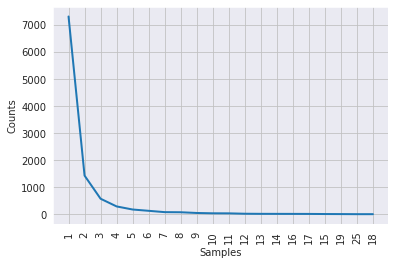

In [32]:
import nltk
import seaborn as sns

sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(values)
nlp_words.plot(20);

In [33]:
filtered_dataset = []
for key, value in total_counter.items():
  if value > 3: #>3 for the entire dataset
    filtered_dataset.append(key)

In [34]:
len(filtered_dataset)

1052

In [71]:
import numpy as np
  
binary_array = np.empty([len(tokens_list), len(filtered_dataset)], dtype=np.float32)

for i in range(len(tokens_list)):
  for j in range(len(tokens_list[i])):
    if str(tokens_list[i][j]) in filtered_dataset: 
      binary_array[i][j] = np.float32(1.0)
    elif str(tokens_list[i][j]) not in filtered_dataset:
      binary_array[i][j] = np.float32(0.0)

In [72]:
binary_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [73]:
from scipy.sparse import csr_matrix
binary_csr_matrix = csr_matrix(binary_array)

In [74]:
print(binary_csr_matrix)

  (0, 0)	1.0
  (0, 3)	1.0
  (0, 7)	1.0
  (0, 11)	1.0
  (0, 13)	1.0
  (1, 5)	1.0
  (1, 10)	1.0
  (1, 12)	1.0
  (1, 13)	1.0
  (2, 0)	1.0
  (2, 1)	1.0
  (2, 2)	1.0
  (3, 0)	1.0
  (3, 1)	1.0
  (3, 12)	1.0
  (4, 0)	1.0
  (4, 7)	1.0
  (4, 13)	1.0
  (5, 0)	1.0
  (5, 2)	1.0
  (5, 5)	1.0
  (6, 3)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (8, 3)	1.0
  :	:
  (2993, 0)	1.0
  (2993, 6)	1.0
  (2993, 8)	1.0
  (2994, 0)	1.0
  (2994, 1)	1.0
  (2994, 7)	1.0
  (2994, 11)	1.0
  (2994, 18)	1.0
  (2995, 0)	1.0
  (2995, 3)	1.0
  (2995, 6)	1.0
  (2995, 12)	1.0
  (2995, 14)	1.0
  (2995, 15)	1.0
  (2996, 2)	1.0
  (2997, 0)	1.0
  (2998, 6)	1.0
  (2998, 11)	1.0
  (2999, 0)	1.0
  (2999, 2)	1.0
  (2999, 5)	1.0
  (2999, 10)	1.0
  (2999, 13)	1.0
  (2999, 16)	1.0
  (2999, 19)	1.0


In [76]:
import pickle

a_file = open("node_features_3000.pkl", "wb")
pickle.dump(binary_csr_matrix, a_file)
a_file.close()

In [42]:
cp /content/node_features_3000_double.pkl /content/drive/MyDrive/data/GreekDataset

##<u>Node Labels</u>

In [60]:
node_labels_array = np.empty([len(testing_df)], dtype=np.int64)

for i in range(len(testing_df)):
  node_labels_array[i] = testing_df.iloc[i].label

In [61]:
len(node_labels_array)

3000

In [62]:
np.shape(node_labels_array)

(3000,)

In [63]:
print(node_labels_array)

[0 1 0 ... 0 1 0]


In [66]:
import pickle

a_file = open("node_labels_3000.pkl", "wb")
pickle.dump(node_labels_array, a_file)
a_file.close()

In [66]:
cp /content/drive/MyDrive/node_labels_3000.pkl /content/drive/MyDrive/data/GreekDataset

##<u>Processing Data</u>

In [68]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [69]:
ls

'1ο Εξάμηνο'/
'2ο Εξάμηνο'/
'3ο Εξάμηνο'/
'4ο Εξάμηνο'/
'5ο Εξάμηνο'/
'7o εξάμηνο Online Lectures.gsheet'
'Colab Notebooks'/
'Copy of TSA Intermediate Approach 2.0.gsheet'
 data/
 example.svg
'Fake News Detection'/
 gat_results/
 MichalisConstantinou_Resume.gdoc
 my_dataset.csv
 node_features_3000.pkl
 node_labels_3000.pkl
'SSTT-x-Jamal-Browner-12-Week-Intermediate-Vol-1 copy.xlsx'
 tests/
'Μαθήματα Επιλογής'/
'Ροή Η'/
'Ροή Λ'/
'Ροή Ο'/
'Ροή Υ'/


In [3]:
cd drive/MyDrive

/content/drive/MyDrive


In [4]:
!pip install python-igraph
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo
!pip install gitpython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 38.3 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=03e7cee1f4a4b283f97c7ce1c7fd85efa22393fd2f512704d0a6770cec9ebc80
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
libgif-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-d

In [49]:
import cairo
from google.colab import files
from IPython.display import SVG, display, Image

In [50]:
def show_svg(file):
    display(SVG(filename=file))

In [51]:
with cairo.SVGSurface("example.svg", 200, 200) as surface:
    context = cairo.Context(surface)
    x, y, x1, y1 = 0.1, 0.5, 0.4, 0.9
    x2, y2, x3, y3 = 0.6, 0.1, 0.9, 0.5
    context.scale(200, 200)
    context.set_line_width(0.04)
    context.move_to(x, y)
    context.curve_to(x1, y1, x2, y2, x3, y3)
    context.stroke()
    context.set_source_rgba(1, 0.2, 0.2, 0.6)
    context.set_line_width(0.02)
    context.move_to(x, y)
    context.line_to(x1, y1)
    context.move_to(x2, y2)
    context.line_to(x3, y3)
    context.stroke()

In [5]:
import pickle

# Visualization related imports
import matplotlib.pyplot as plt
import networkx as nx
import igraph as ig

# Main computation libraries
import scipy.sparse as sp
import numpy as np

# Deep learning related imports
import torch

In [6]:
import os
import enum


# Supported datasets - only Cora in this notebook
class DatasetType(enum.Enum):
    GreekDataset = 0

    
# Networkx is not precisely made with drawing as its main feature but I experimented with it a bit
class GraphVisualizationTool(enum.Enum):
    NETWORKX = 0,
    IGRAPH = 1


# We'll be dumping and reading the data from this directory
DATA_DIR_PATH = os.path.join(os.getcwd(), 'data')
GreekDataset_PATH = os.path.join(DATA_DIR_PATH, 'GreekDataset')  # this is checked-in no need to make a directory

#
# Cora specific constants
#

# Thomas Kipf et al. first used this split in GCN paper and later Petar Veličković et al. in GAT paper
GreekDataset_TRAIN_RANGE = [0, 140]  # we're using the first 140 nodes as the training nodes
GreekDataset_VAL_RANGE = [140, 140+500]
GreekDataset_TEST_RANGE = [2000, 2000+1000] #[1708, 1708+1000]
GreekDataset_NUM_INPUT_FEATURES = 1052 #length of the dictionary
GreekDataset_NUM_CLASSES = 2

# Used whenever we need to visualzie points from different classes (t-SNE, CORA visualization)
GreekDataset_label_to_color_map = {0: "red", 1: "blue"}

In [7]:
# All Cora data is stored as pickle
def pickle_read(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)

    return data

def pickle_save(path, data):
    with open(path, 'wb') as file:
        pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
# We'll pass the training config dictionary a bit later
def load_graph_data(training_config, device):
    dataset_name = training_config['dataset_name'].lower()
    should_visualize = training_config['should_visualize']

    if dataset_name == DatasetType.GreekDataset.name.lower():

        # shape = (N, FIN), where N is the number of nodes and FIN is the number of input features
        node_features_csr = pickle_read(os.path.join(GreekDataset_PATH, 'node_features_3000.pkl'))
        # shape = (N, 1)
        node_labels_npy = pickle_read(os.path.join(GreekDataset_PATH, 'node_labels_3000.pkl'))
        # shape = (N, number of neighboring nodes) <- this is a dictionary not a matrix!
        adjacency_list_dict = pickle_read(os.path.join(GreekDataset_PATH, 'adjacency_dict_3000.pkl'))

        # Normalize the features (helps with training)
        node_features_csr = normalize_features_sparse(node_features_csr)
        num_of_nodes = len(node_labels_npy)

        # shape = (2, E), where E is the number of edges, and 2 for source and target nodes. Basically edge index
        # contains tuples of the format S->T, e.g. 0->3 means that node with id 0 points to a node with id 3.
        topology = build_edge_index(adjacency_list_dict, num_of_nodes, add_self_edges=True)

        # Note: topology is just a fancy way of naming the graph structure data 
        # (aside from edge index it could be in the form of an adjacency matrix)

        if should_visualize:  # network analysis and graph drawing
            plot_in_out_degree_distributions(topology, num_of_nodes, dataset_name)  # we'll define these in a second
            visualize_graph(topology, node_labels_npy, dataset_name)

        # Convert to dense PyTorch tensors

        # Needs to be long int type because later functions like PyTorch's index_select expect it
        topology = torch.tensor(topology, dtype=torch.long, device=device)
        node_labels = torch.tensor(node_labels_npy, dtype=torch.long, device=device)  # Cross entropy expects a long int
        node_features = torch.tensor(node_features_csr.todense(), device=device)

        # Indices that help us extract nodes that belong to the train/val and test splits
        train_indices = torch.arange(GreekDataset_TRAIN_RANGE[0], GreekDataset_TRAIN_RANGE[1], dtype=torch.long, device=device)
        val_indices = torch.arange(GreekDataset_VAL_RANGE[0], GreekDataset_VAL_RANGE[1], dtype=torch.long, device=device)
        test_indices = torch.arange(GreekDataset_TEST_RANGE[0], GreekDataset_TEST_RANGE[1], dtype=torch.long, device=device)

        return node_features, node_labels, topology, train_indices, val_indices, test_indices
    else:
        raise Exception(f'{dataset_name} not yet supported.')

In [9]:
print(GreekDataset_TEST_RANGE[1])

3000


In [10]:
def normalize_features_sparse(node_features_sparse):
    assert sp.issparse(node_features_sparse), f'Expected a sparse matrix, got {node_features_sparse}.'

    # Instead of dividing (like in normalize_features_dense()) we do multiplication with inverse sum of features.
    # Modern hardware (GPUs, TPUs, ASICs) is optimized for fast matrix multiplications! ^^ (* >> /)
    # shape = (N, FIN) -> (N, 1), where N number of nodes and FIN number of input features
    node_features_sum = np.array(node_features_sparse.sum(-1))  # sum features for every node feature vector

    # Make an inverse (remember * by 1/x is better (faster) then / by x)
    # shape = (N, 1) -> (N)
    node_features_inv_sum = np.power(node_features_sum, -1).squeeze()

    # Again certain sums will be 0 so 1/0 will give us inf so we replace those by 1 which is a neutral element for mul
    node_features_inv_sum[np.isinf(node_features_inv_sum)] = 1.

    # Create a diagonal matrix whose values on the diagonal come from node_features_inv_sum
    diagonal_inv_features_sum_matrix = sp.diags(node_features_inv_sum)

    # We return the normalized features.
    return diagonal_inv_features_sum_matrix.dot(node_features_sparse)

In [11]:
def build_edge_index(adjacency_list_dict, num_of_nodes, add_self_edges=True):
    source_nodes_ids, target_nodes_ids = [], []
    seen_edges = set()

    for src_node, neighboring_nodes in adjacency_list_dict.items():
        for trg_node in neighboring_nodes:
            # if this edge hasn't been seen so far we add it to the edge index (coalescing - removing duplicates)
            if (src_node, trg_node) not in seen_edges:  # it'd be easy to explicitly remove self-edges (Cora has none..)
                source_nodes_ids.append(src_node)
                target_nodes_ids.append(trg_node)

                seen_edges.add((src_node, trg_node))

    if add_self_edges:
        source_nodes_ids.extend(np.arange(num_of_nodes))
        target_nodes_ids.extend(np.arange(num_of_nodes))

    # shape = (2, E), where E is the number of edges in the graph
    edge_index = np.row_stack((source_nodes_ids, target_nodes_ids))

    return edge_index

In [12]:
def plot_in_out_degree_distributions():
    pass

def visualize_graph():
    pass

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # checking whether you have a GPU

config = {
    'dataset_name': DatasetType.GreekDataset.name,
    'should_visualize': False
}

node_features, node_labels, edge_index, train_indices, val_indices, test_indices = load_graph_data(config, device)

print(node_features.shape, node_features.dtype)
print(node_labels.shape, node_labels.dtype)
print(edge_index.shape, edge_index.dtype)
print(train_indices.shape, train_indices.dtype)
print(val_indices.shape, val_indices.dtype)
print(test_indices.shape, test_indices.dtype)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


torch.Size([3000, 1052]) torch.float32
torch.Size([3000]) torch.int64
torch.Size([2, 4189280]) torch.int64
torch.Size([140]) torch.int64
torch.Size([500]) torch.int64
torch.Size([1000]) torch.int64


In [13]:
def plot_in_out_degree_distributions(edge_index, num_of_nodes, dataset_name):
    """
        Note: It would be easy to do various kinds of powerful network analysis using igraph/networkx, etc.
        I chose to explicitly calculate only the node degree statistics here, but you can go much further if needed and
        calculate the graph diameter, number of triangles and many other concepts from the network analysis field.

    """
    if isinstance(edge_index, torch.Tensor):
        edge_index = edge_index.cpu().numpy()
        
    assert isinstance(edge_index, np.ndarray), f'Expected NumPy array got {type(edge_index)}.'

    # Store each node's input and output degree (they're the same for undirected graphs such as Cora)
    in_degrees = np.zeros(num_of_nodes, dtype=np.int)
    out_degrees = np.zeros(num_of_nodes, dtype=np.int)

    # Edge index shape = (2, E), the first row contains the source nodes, the second one target/sink nodes
    # Note on terminology: source nodes point to target/sink nodes
    num_of_edges = edge_index.shape[1]
    for cnt in range(num_of_edges):
        source_node_id = edge_index[0, cnt]
        target_node_id = edge_index[1, cnt]

        out_degrees[source_node_id] += 1  # source node points towards some other node -> increment its out degree
        in_degrees[target_node_id] += 1  # similarly here

    hist = np.zeros(np.max(out_degrees) + 1)
    for out_degree in out_degrees:
        hist[out_degree] += 1

    fig = plt.figure(figsize=(12,8), dpi=100)  # otherwise plots are really small in Jupyter Notebook
    fig.subplots_adjust(hspace=0.6)

    plt.subplot(311)
    plt.plot(in_degrees, color='red')
    plt.xlabel('node id'); plt.ylabel('in-degree count'); plt.title('Input degree for different node ids')

    plt.subplot(312)
    plt.plot(out_degrees, color='green')
    plt.xlabel('node id'); plt.ylabel('out-degree count'); plt.title('Out degree for different node ids')

    plt.subplot(313)
    plt.plot(hist, color='blue')
    plt.xlabel('node degree')
    plt.ylabel('# nodes for a given out-degree') 
    plt.title(f'Node out-degree distribution for {dataset_name} dataset')
    plt.xticks(np.arange(0, len(hist), 5.0))

    plt.grid(True)
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

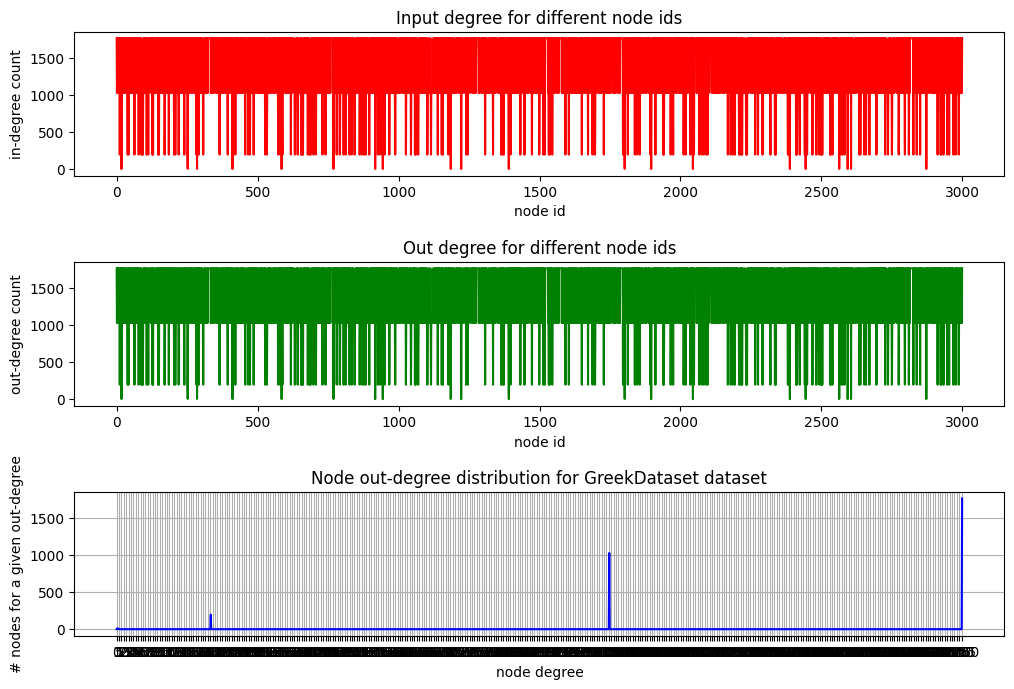

In [14]:
num_of_nodes = len(node_labels)
plot_in_out_degree_distributions(edge_index, num_of_nodes, config['dataset_name'])

In [15]:
import torch.nn as nn
from torch.optim import Adam


class GAT(torch.nn.Module):
    """
    The most interesting and hardest implementation is implementation #3.
    Imp1 and imp2 differ in subtle details but are basically the same thing.

    So I'll focus on imp #3 in this notebook.

    """

    def __init__(self, num_of_layers, num_heads_per_layer, num_features_per_layer, add_skip_connection=True, bias=True,
                 dropout=0.6, log_attention_weights=False):
        super().__init__()
        assert num_of_layers == len(num_heads_per_layer) == len(num_features_per_layer) - 1, f'Enter valid arch params.'

        num_heads_per_layer = [1] + num_heads_per_layer  # trick - so that I can nicely create GAT layers below

        gat_layers = []  # collect GAT layers
        for i in range(num_of_layers):
            layer = GATLayer(
                num_in_features=num_features_per_layer[i] * num_heads_per_layer[i],  # consequence of concatenation
                num_out_features=num_features_per_layer[i+1],
                num_of_heads=num_heads_per_layer[i+1],
                concat=True if i < num_of_layers - 1 else False,  # last GAT layer does mean avg, the others do concat
                activation=nn.ELU() if i < num_of_layers - 1 else None,  # last layer just outputs raw scores
                dropout_prob=dropout,
                add_skip_connection=add_skip_connection,
                bias=bias,
                log_attention_weights=log_attention_weights
            )
            gat_layers.append(layer)

        self.gat_net = nn.Sequential(
            *gat_layers,
        )

    # data is just a (in_nodes_features, edge_index) tuple, I had to do it like this because of the nn.Sequential:
    # https://discuss.pytorch.org/t/forward-takes-2-positional-arguments-but-3-were-given-for-nn-sqeuential-with-linear-layers/65698
    def forward(self, data):
        return self.gat_net(data) ##########

In [16]:
class GATLayer(torch.nn.Module):
    """
    Implementation #3 was inspired by PyTorch Geometric: https://github.com/rusty1s/pytorch_geometric

    But, it's hopefully much more readable! (and of similar performance)

    """
    
    # We'll use these constants in many functions so just extracting them here as member fields
    src_nodes_dim = 0  # position of source nodes in edge index
    trg_nodes_dim = 1  # position of target nodes in edge index

    # These may change in the inductive setting - leaving it like this for now (not future proof)
    nodes_dim = 0      # node dimension (axis is maybe a more familiar term nodes_dim is the position of "N" in tensor)
    head_dim = 1       # attention head dim

    def __init__(self, num_in_features, num_out_features, num_of_heads, concat=True, activation=nn.ELU(),
                 dropout_prob=0.6, add_skip_connection=True, bias=True, log_attention_weights=False):

        super().__init__()

        self.num_of_heads = num_of_heads
        self.num_out_features = num_out_features
        self.concat = concat  # whether we should concatenate or average the attention heads
        self.add_skip_connection = add_skip_connection

        #
        # Trainable weights: linear projection matrix (denoted as "W" in the paper), attention target/source
        # (denoted as "a" in the paper) and bias (not mentioned in the paper but present in the official GAT repo)
        #

        # You can treat this one matrix as num_of_heads independent W matrices
        self.linear_proj = nn.Linear(num_in_features, num_of_heads * num_out_features, bias=False)

        # After we concatenate target node (node i) and source node (node j) we apply the "additive" scoring function
        # which gives us un-normalized score "e". Here we split the "a" vector - but the semantics remain the same.
        # Basically instead of doing [x, y] (concatenation, x/y are node feature vectors) and dot product with "a"
        # we instead do a dot product between x and "a_left" and y and "a_right" and we sum them up
        self.scoring_fn_target = nn.Parameter(torch.Tensor(1, num_of_heads, num_out_features))
        self.scoring_fn_source = nn.Parameter(torch.Tensor(1, num_of_heads, num_out_features))

        # Bias is definitely not crucial to GAT - feel free to experiment (I pinged the main author, Petar, on this one)
        if bias and concat:
            self.bias = nn.Parameter(torch.Tensor(num_of_heads * num_out_features))
        elif bias and not concat:
            self.bias = nn.Parameter(torch.Tensor(num_out_features))
        else:
            self.register_parameter('bias', None)

        if add_skip_connection:
            self.skip_proj = nn.Linear(num_in_features, num_of_heads * num_out_features, bias=False)
        else:
            self.register_parameter('skip_proj', None)

        #
        # End of trainable weights
        #

        self.leakyReLU = nn.LeakyReLU(0.2)  # using 0.2 as in the paper, no need to expose every setting
        self.activation = activation
        # Probably not the nicest design but I use the same module in 3 locations, before/after features projection
        # and for attention coefficients. Functionality-wise it's the same as using independent modules.
        self.dropout = nn.Dropout(p=dropout_prob)

        self.log_attention_weights = log_attention_weights  # whether we should log the attention weights
        self.attention_weights = None  # for later visualization purposes, I cache the weights here

        self.init_params()
        
    def forward(self, data):
        #
        # Step 1: Linear Projection + regularization
        #

        in_nodes_features, edge_index = data  # unpack data
        num_of_nodes = in_nodes_features.shape[self.nodes_dim]
        assert edge_index.shape[0] == 2, f'Expected edge index with shape=(2,E) got {edge_index.shape}'

        # shape = (N, FIN) where N - number of nodes in the graph, FIN - number of input features per node
        # We apply the dropout to all of the input node features (as mentioned in the paper)
        # Note: for Cora features are already super sparse so it's questionable how much this actually helps
        in_nodes_features = self.dropout(in_nodes_features)

        # shape = (N, FIN) * (FIN, NH*FOUT) -> (N, NH, FOUT) where NH - number of heads, FOUT - num of output features
        # We project the input node features into NH independent output features (one for each attention head)
        nodes_features_proj = self.linear_proj(in_nodes_features).view(-1, self.num_of_heads, self.num_out_features)

        nodes_features_proj = self.dropout(nodes_features_proj)  # in the official GAT imp they did dropout here as well

        #
        # Step 2: Edge attention calculation
        #

        # Apply the scoring function (* represents element-wise (a.k.a. Hadamard) product)
        # shape = (N, NH, FOUT) * (1, NH, FOUT) -> (N, NH, 1) -> (N, NH) because sum squeezes the last dimension
        # Optimization note: torch.sum() is as performant as .sum() in my experiments
        scores_source = (nodes_features_proj * self.scoring_fn_source).sum(dim=-1)
        scores_target = (nodes_features_proj * self.scoring_fn_target).sum(dim=-1)

        # We simply copy (lift) the scores for source/target nodes based on the edge index. Instead of preparing all
        # the possible combinations of scores we just prepare those that will actually be used and those are defined
        # by the edge index.
        # scores shape = (E, NH), nodes_features_proj_lifted shape = (E, NH, FOUT), E - number of edges in the graph
        scores_source_lifted, scores_target_lifted, nodes_features_proj_lifted = self.lift(scores_source, scores_target, nodes_features_proj, edge_index)
        scores_per_edge = self.leakyReLU(scores_source_lifted + scores_target_lifted)

        # shape = (E, NH, 1)
        attentions_per_edge = self.neighborhood_aware_softmax(scores_per_edge, edge_index[self.trg_nodes_dim], num_of_nodes)
        # Add stochasticity to neighborhood aggregation
        attentions_per_edge = self.dropout(attentions_per_edge)

        #
        # Step 3: Neighborhood aggregation
        #

        # Element-wise (aka Hadamard) product. Operator * does the same thing as torch.mul
        # shape = (E, NH, FOUT) * (E, NH, 1) -> (E, NH, FOUT), 1 gets broadcast into FOUT
        nodes_features_proj_lifted_weighted = nodes_features_proj_lifted * attentions_per_edge

        # This part sums up weighted and projected neighborhood feature vectors for every target node
        # shape = (N, NH, FOUT)
        out_nodes_features = self.aggregate_neighbors(nodes_features_proj_lifted_weighted, edge_index, in_nodes_features, num_of_nodes)

        #
        # Step 4: Residual/skip connections, concat and bias
        #

        out_nodes_features = self.skip_concat_bias(attentions_per_edge, in_nodes_features, out_nodes_features)
        return (out_nodes_features, edge_index)

    #
    # Helper functions (without comments there is very little code so don't be scared!)
    #

    def neighborhood_aware_softmax(self, scores_per_edge, trg_index, num_of_nodes):
        """
        As the fn name suggest it does softmax over the neighborhoods. Example: say we have 5 nodes in a graph.
        Two of them 1, 2 are connected to node 3. If we want to calculate the representation for node 3 we should take
        into account feature vectors of 1, 2 and 3 itself. Since we have scores for edges 1-3, 2-3 and 3-3
        in scores_per_edge variable, this function will calculate attention scores like this: 1-3/(1-3+2-3+3-3)
        (where 1-3 is overloaded notation it represents the edge 1-3 and its (exp) score) and similarly for 2-3 and 3-3
         i.e. for this neighborhood we don't care about other edge scores that include nodes 4 and 5.

        Note:
        Subtracting the max value from logits doesn't change the end result but it improves the numerical stability
        and it's a fairly common "trick" used in pretty much every deep learning framework.
        Check out this link for more details:

        https://stats.stackexchange.com/questions/338285/how-does-the-subtraction-of-the-logit-maximum-improve-learning

        """
        # Calculate the numerator. Make logits <= 0 so that e^logit <= 1 (this will improve the numerical stability)
        scores_per_edge = scores_per_edge - scores_per_edge.max()
        exp_scores_per_edge = scores_per_edge.exp()  # softmax

        # Calculate the denominator. shape = (E, NH)
        neigborhood_aware_denominator = self.sum_edge_scores_neighborhood_aware(exp_scores_per_edge, trg_index, num_of_nodes)

        # 1e-16 is theoretically not needed but is only there for numerical stability (avoid div by 0) - due to the
        # possibility of the computer rounding a very small number all the way to 0.
        attentions_per_edge = exp_scores_per_edge / (neigborhood_aware_denominator + 1e-16)

        # shape = (E, NH) -> (E, NH, 1) so that we can do element-wise multiplication with projected node features
        return attentions_per_edge.unsqueeze(-1)

    def sum_edge_scores_neighborhood_aware(self, exp_scores_per_edge, trg_index, num_of_nodes):
        # The shape must be the same as in exp_scores_per_edge (required by scatter_add_) i.e. from E -> (E, NH)
        trg_index_broadcasted = self.explicit_broadcast(trg_index, exp_scores_per_edge)

        # shape = (N, NH), where N is the number of nodes and NH the number of attention heads
        size = list(exp_scores_per_edge.shape)  # convert to list otherwise assignment is not possible
        size[self.nodes_dim] = num_of_nodes
        neighborhood_sums = torch.zeros(size, dtype=exp_scores_per_edge.dtype, device=exp_scores_per_edge.device)

        # position i will contain a sum of exp scores of all the nodes that point to the node i (as dictated by the
        # target index)
        neighborhood_sums.scatter_add_(self.nodes_dim, trg_index_broadcasted, exp_scores_per_edge)

        # Expand again so that we can use it as a softmax denominator. e.g. node i's sum will be copied to
        # all the locations where the source nodes pointed to i (as dictated by the target index)
        # shape = (N, NH) -> (E, NH)
        return neighborhood_sums.index_select(self.nodes_dim, trg_index)

    def aggregate_neighbors(self, nodes_features_proj_lifted_weighted, edge_index, in_nodes_features, num_of_nodes):
        size = list(nodes_features_proj_lifted_weighted.shape)  # convert to list otherwise assignment is not possible
        size[self.nodes_dim] = num_of_nodes  # shape = (N, NH, FOUT)
        out_nodes_features = torch.zeros(size, dtype=in_nodes_features.dtype, device=in_nodes_features.device)

        # shape = (E) -> (E, NH, FOUT)
        trg_index_broadcasted = self.explicit_broadcast(edge_index[self.trg_nodes_dim], nodes_features_proj_lifted_weighted)
        # aggregation step - we accumulate projected, weighted node features for all the attention heads
        # shape = (E, NH, FOUT) -> (N, NH, FOUT)
        out_nodes_features.scatter_add_(self.nodes_dim, trg_index_broadcasted, nodes_features_proj_lifted_weighted)

        return out_nodes_features

    def lift(self, scores_source, scores_target, nodes_features_matrix_proj, edge_index):
        """
        Lifts i.e. duplicates certain vectors depending on the edge index.
        One of the tensor dims goes from N -> E (that's where the "lift" comes from).

        """
        src_nodes_index = edge_index[self.src_nodes_dim]
        trg_nodes_index = edge_index[self.trg_nodes_dim]

        # Using index_select is faster than "normal" indexing (scores_source[src_nodes_index]) in PyTorch!
        scores_source = scores_source.index_select(self.nodes_dim, src_nodes_index)
        scores_target = scores_target.index_select(self.nodes_dim, trg_nodes_index)
        nodes_features_matrix_proj_lifted = nodes_features_matrix_proj.index_select(self.nodes_dim, src_nodes_index)

        return scores_source, scores_target, nodes_features_matrix_proj_lifted

    def explicit_broadcast(self, this, other):
        # Append singleton dimensions until this.dim() == other.dim()
        for _ in range(this.dim(), other.dim()):
            this = this.unsqueeze(-1)

        # Explicitly expand so that shapes are the same
        return this.expand_as(other)

    def init_params(self):
        """
        The reason we're using Glorot (aka Xavier uniform) initialization is because it's a default TF initialization:
            https://stackoverflow.com/questions/37350131/what-is-the-default-variable-initializer-in-tensorflow

        The original repo was developed in TensorFlow (TF) and they used the default initialization.
        Feel free to experiment - there may be better initializations depending on your problem.

        """
        nn.init.xavier_uniform_(self.linear_proj.weight)
        nn.init.xavier_uniform_(self.scoring_fn_target)
        nn.init.xavier_uniform_(self.scoring_fn_source)

        if self.bias is not None:
            torch.nn.init.zeros_(self.bias)

    def skip_concat_bias(self, attention_coefficients, in_nodes_features, out_nodes_features):
        if self.log_attention_weights:  # potentially log for later visualization in playground.py
            self.attention_weights = attention_coefficients

        if self.add_skip_connection:  # add skip or residual connection
            if out_nodes_features.shape[-1] == in_nodes_features.shape[-1]:  # if FIN == FOUT
                # unsqueeze does this: (N, FIN) -> (N, 1, FIN), out features are (N, NH, FOUT) so 1 gets broadcast to NH
                # thus we're basically copying input vectors NH times and adding to processed vectors
                out_nodes_features += in_nodes_features.unsqueeze(1)
            else:
                # FIN != FOUT so we need to project input feature vectors into dimension that can be added to output
                # feature vectors. skip_proj adds lots of additional capacity which may cause overfitting.
                out_nodes_features += self.skip_proj(in_nodes_features).view(-1, self.num_of_heads, self.num_out_features)

        if self.concat:
            # shape = (N, NH, FOUT) -> (N, NH*FOUT)
            out_nodes_features = out_nodes_features.view(-1, self.num_of_heads * self.num_out_features)
        else:
            # shape = (N, NH, FOUT) -> (N, FOUT)
            out_nodes_features = out_nodes_features.mean(dim=self.head_dim)

        if self.bias is not None:
            out_nodes_features += self.bias

        return out_nodes_features if self.activation is None else self.activation(out_nodes_features)

In [17]:
from torch.utils.tensorboard import SummaryWriter


# 3 different model training/eval phases used in train.py
class LoopPhase(enum.Enum):
    TRAIN = 0,
    VAL = 1,
    TEST = 2

    
writer = SummaryWriter()  # (tensorboard) writer will output to ./runs/ directory by default


# Global vars used for early stopping. After some number of epochs (as defined by the patience_period var) without any
# improvement on the validation dataset (measured via accuracy metric), we'll break out from the training loop.
BEST_VAL_ACC = 0
BEST_VAL_LOSS = 0
PATIENCE_CNT = 0

BINARIES_PATH = os.path.join(os.getcwd(), 'data/models', 'binaries')
CHECKPOINTS_PATH = os.path.join(os.getcwd(), 'data/models', 'checkpoints')

# Make sure these exist as the rest of the code assumes it
os.makedirs(BINARIES_PATH, exist_ok=True)
os.makedirs(CHECKPOINTS_PATH, exist_ok=True)

In [102]:
import git
import re  # regex


def get_training_state(training_config, model):
    training_state = {
        "commit_hash": git.Repo(search_parent_directories=True).head.object.hexsha,

        # Training details
        "dataset_name": training_config['dataset_name'],
        "num_of_epochs": training_config['num_of_epochs'],
        "test_acc": training_config['test_acc'],

        # Model structure
        "num_of_layers": training_config['num_of_layers'],
        "num_heads_per_layer": training_config['num_heads_per_layer'],
        "num_features_per_layer": training_config['num_features_per_layer'],
        "add_skip_connection": training_config['add_skip_connection'],
        "bias": training_config['bias'],
        "dropout": training_config['dropout'],

        # Model state
        "state_dict": model.state_dict()
    }

    return training_state


def print_model_metadata(training_state):
    header = f'\n{"*"*5} Model training metadata: {"*"*5}'
    print(header)

    for key, value in training_state.items():
        if key != 'state_dict':  # don't print state_dict just a bunch of numbers...
            print(f'{key}: {value}')
    print(f'{"*" * len(header)}\n')


# This one makes sure we don't overwrite the valuable model binaries (feel free to ignore - not crucial to GAT method)
def get_available_binary_name():
    prefix = 'gat'

    def valid_binary_name(binary_name):
        # First time you see raw f-string? Don't worry the only trick is to double the brackets.
        pattern = re.compile(rf'{prefix}_[0-9]{{6}}\.pth')
        return re.fullmatch(pattern, binary_name) is not None

    # Just list the existing binaries so that we don't overwrite them but write to a new one
    valid_binary_names = list(filter(valid_binary_name, os.listdir(BINARIES_PATH)))
    if len(valid_binary_names) > 0:
        last_binary_name = sorted(valid_binary_names)[-1]
        new_suffix = int(last_binary_name.split('.')[0][-6:]) + 1  # increment by 1
        return f'{prefix}_{str(new_suffix).zfill(6)}.pth'
    else:
        return f'{prefix}_000000.pth'

In [103]:
import argparse


def get_training_args():
    parser = argparse.ArgumentParser()

    # Training related
    parser.add_argument("--num_of_epochs", type=int, help="number of training epochs", default=10000)
    parser.add_argument("--patience_period", type=int, help="number of epochs with no improvement on val before terminating", default=1000)
    parser.add_argument("--lr", type=float, help="model learning rate", default=5e-3)
    parser.add_argument("--weight_decay", type=float, help="L2 regularization on model weights", default=5e-4)
    parser.add_argument("--should_test", type=bool, help='should test the model on the test dataset?', default=True)

    # Dataset related
    parser.add_argument("--dataset_name", choices=[el.name for el in DatasetType], help='dataset to use for training', default=DatasetType.GreekDataset.name)
    parser.add_argument("--should_visualize", type=bool, help='should visualize the dataset?', default=False)

    # Logging/debugging/checkpoint related (helps a lot with experimentation)
    parser.add_argument("--enable_tensorboard", type=bool, help="enable tensorboard logging", default=False)
    parser.add_argument("--console_log_freq", type=int, help="log to output console (epoch) freq (None for no logging)", default=100)
    parser.add_argument("--checkpoint_freq", type=int, help="checkpoint model saving (epoch) freq (None for no logging)", default=1000)
    args = parser.parse_args("")

    # Model architecture related - this is the architecture as defined in the official paper (for Cora classification)
    gat_config = {
        "num_of_layers": 2,  # GNNs, contrary to CNNs, are often shallow (it ultimately depends on the graph properties)
        "num_heads_per_layer": [8, 1],
        "num_features_per_layer": [GreekDataset_NUM_INPUT_FEATURES, 8, GreekDataset_NUM_CLASSES],
        "add_skip_connection": False,  # hurts perf on Cora
        "bias": True,  # result is not so sensitive to bias
        "dropout": 0.6,  # result is sensitive to dropout
    }

    # Wrapping training configuration into a dictionary
    training_config = dict()
    for arg in vars(args):
        training_config[arg] = getattr(args, arg)

    # Add additional config information
    training_config.update(gat_config)

    return training_config

In [104]:
import time


def train_gat(config):
    global BEST_VAL_ACC, BEST_VAL_LOSS

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # checking whether you have a GPU, I hope so!

    # Step 1: load the graph data
    node_features, node_labels, edge_index, train_indices, val_indices, test_indices = load_graph_data(config, device)

    # Step 2: prepare the model
    gat = GAT(
        num_of_layers=config['num_of_layers'],
        num_heads_per_layer=config['num_heads_per_layer'],
        num_features_per_layer=config['num_features_per_layer'],
        add_skip_connection=config['add_skip_connection'],
        bias=config['bias'],
        dropout=config['dropout'],
        log_attention_weights=False  # no need to store attentions, used only in playground.py while visualizing
    ).to(device)

    # Step 3: Prepare other training related utilities (loss & optimizer and decorator function)
    loss_fn = nn.CrossEntropyLoss(reduction='mean')
    optimizer = Adam(gat.parameters(), lr=config['lr'], weight_decay=config['weight_decay'])

    # THIS IS THE CORE OF THE TRAINING (we'll define it in a minute)
    # The decorator function makes things cleaner since there is a lot of redundancy between the train and val loops
    main_loop = get_main_loop(
        config,
        gat,
        loss_fn,
        optimizer,
        node_features,
        node_labels,
        edge_index,
        train_indices,
        val_indices,
        test_indices,
        config['patience_period'],
        time.time())

    BEST_VAL_ACC, BEST_VAL_LOSS, PATIENCE_CNT = [0, 0, 0]  # reset vars used for early stopping

    # Step 4: Start the training procedure
    for epoch in range(config['num_of_epochs']):
        # Training loop
        main_loop(phase=LoopPhase.TRAIN, epoch=epoch) ###SOSOSOSOSOSO

        # Validation loop
        with torch.no_grad():
            try:
                main_loop(phase=LoopPhase.VAL, epoch=epoch)
            except Exception as e:  # "patience has run out" exception :O
                print(str(e))
                break  # break out from the training loop

    # Step 5: Potentially test your model
    # Don't overfit to the test dataset - only when you've fine-tuned your model on the validation dataset should you
    # report your final loss and accuracy on the test dataset. Friends don't let friends overfit to the test data. <3
    if config['should_test']:
        test_acc = main_loop(phase=LoopPhase.TEST)
        config['test_acc'] = test_acc
        print(f'Test accuracy = {test_acc}')
    else:
        config['test_acc'] = -1

    # Save the latest GAT in the binaries directory
    torch.save(get_training_state(config, gat), os.path.join(BINARIES_PATH, get_available_binary_name()))

In [105]:
# Simple decorator function so that I don't have to pass arguments that don't change from epoch to epoch
def get_main_loop(config, gat, cross_entropy_loss, optimizer, node_features, node_labels, edge_index, train_indices, val_indices, test_indices, patience_period, time_start):

    node_dim = 0  # this will likely change as soon as I add an inductive example (Cora is transductive)

    train_labels = node_labels.index_select(node_dim, train_indices)
    val_labels = node_labels.index_select(node_dim, val_indices)
    test_labels = node_labels.index_select(node_dim, test_indices)

    # node_features shape = (N, FIN), edge_index shape = (2, E)
    graph_data = (node_features, edge_index)  # I pack data into tuples because GAT uses nn.Sequential which requires it

    def get_node_indices(phase):
        if phase == LoopPhase.TRAIN:
            return train_indices
        elif phase == LoopPhase.VAL:
            return val_indices
        else:
            return test_indices

    def get_node_labels(phase):
        if phase == LoopPhase.TRAIN:
            return train_labels
        elif phase == LoopPhase.VAL:
            return val_labels
        else:
            return test_labels

    def main_loop(phase, epoch=0):
        global BEST_VAL_ACC, BEST_VAL_LOSS, PATIENCE_CNT, writer

        # Certain modules behave differently depending on whether we're training the model or not.
        # e.g. nn.Dropout - we only want to drop model weights during the training.
        if phase == LoopPhase.TRAIN:
            gat.train()
        else:
            gat.eval()

        node_indices = get_node_indices(phase)
        gt_node_labels = get_node_labels(phase)  # gt stands for ground truth

        # Do a forwards pass and extract only the relevant node scores (train/val or test ones)
        # Note: [0] just extracts the node_features part of the data (index 1 contains the edge_index)
        # shape = (N, C) where N is the number of nodes in the split (train/val/test) and C is the number of classes
        nodes_unnormalized_scores = gat(graph_data)[0].index_select(node_dim, node_indices)

        # Example: let's take an output for a single node on Cora - it's a vector of size 7 and it contains unnormalized
        # scores like: V = [-1.393,  3.0765, -2.4445,  9.6219,  2.1658, -5.5243, -4.6247]
        # What PyTorch's cross entropy loss does is for every such vector it first applies a softmax, and so we'll
        # have the V transformed into: [1.6421e-05, 1.4338e-03, 5.7378e-06, 0.99797, 5.7673e-04, 2.6376e-07, 6.4848e-07]
        # secondly, whatever the correct class is (say it's 3), it will then take the element at position 3,
        # 0.99797 in this case, and the loss will be -log(0.99797). It does this for every node and applies a mean.
        # You can see that as the probability of the correct class for most nodes approaches 1 we get to 0 loss! <3
        loss = cross_entropy_loss(nodes_unnormalized_scores, gt_node_labels)

        if phase == LoopPhase.TRAIN:
            optimizer.zero_grad()  # clean the trainable weights gradients in the computational graph (.grad fields)
            loss.backward()  # compute the gradients for every trainable weight in the computational graph
            optimizer.step()  # apply the gradients to weights

        # Finds the index of maximum (unnormalized) score for every node and that's the class prediction for that node.
        # Compare those to true (ground truth) labels and find the fraction of correct predictions -> accuracy metric.
        class_predictions = torch.argmax(nodes_unnormalized_scores, dim=-1)
        accuracy = torch.sum(torch.eq(class_predictions, gt_node_labels).long()).item() / len(gt_node_labels)

        #
        # Logging
        #

        if phase == LoopPhase.TRAIN:
            # Log metrics
            if config['enable_tensorboard']:
                writer.add_scalar('training_loss', loss.item(), epoch)
                writer.add_scalar('training_acc', accuracy, epoch)

            # Save model checkpoint
            if config['checkpoint_freq'] is not None and (epoch + 1) % config['checkpoint_freq'] == 0:
                ckpt_model_name = f"gat_ckpt_epoch_{epoch + 1}.pth"
                config['test_acc'] = -1
                torch.save(get_training_state(config, gat), os.path.join(CHECKPOINTS_PATH, ckpt_model_name))

        elif phase == LoopPhase.VAL:
            # Log metrics
            if config['enable_tensorboard']:
                writer.add_scalar('val_loss', loss.item(), epoch)
                writer.add_scalar('val_acc', accuracy, epoch)

            # Log to console
            if config['console_log_freq'] is not None and epoch % config['console_log_freq'] == 0:
                print(f'GAT training: time elapsed= {(time.time() - time_start):.2f} [s] | epoch={epoch + 1} | val acc={accuracy}')

            # The "patience" logic - should we break out from the training loop? If either validation acc keeps going up
            # or the val loss keeps going down we won't stop
            if accuracy > BEST_VAL_ACC or loss.item() < BEST_VAL_LOSS:
                BEST_VAL_ACC = max(accuracy, BEST_VAL_ACC)  # keep track of the best validation accuracy so far
                BEST_VAL_LOSS = min(loss.item(), BEST_VAL_LOSS)
                PATIENCE_CNT = 0  # reset the counter every time we encounter new best accuracy
            else:
                PATIENCE_CNT += 1  # otherwise keep counting

            if PATIENCE_CNT >= patience_period:
                raise Exception('Stopping the training, the universe has no more patience for this training.')

        else:
            return accuracy  # in the case of test phase we just report back the test accuracy

    return main_loop  # return the decorated function

In [97]:
# Train the graph attention network (GAT)
train_gat(get_training_args())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


GAT training: time elapsed= 0.22 [s] | epoch=1 | val acc=0.576
GAT training: time elapsed= 16.70 [s] | epoch=101 | val acc=1.0
GAT training: time elapsed= 33.30 [s] | epoch=201 | val acc=1.0
GAT training: time elapsed= 49.86 [s] | epoch=301 | val acc=0.424
GAT training: time elapsed= 66.35 [s] | epoch=401 | val acc=0.424
GAT training: time elapsed= 82.85 [s] | epoch=501 | val acc=0.424
GAT training: time elapsed= 99.40 [s] | epoch=601 | val acc=0.424
GAT training: time elapsed= 115.98 [s] | epoch=701 | val acc=1.0
GAT training: time elapsed= 132.55 [s] | epoch=801 | val acc=1.0
GAT training: time elapsed= 149.10 [s] | epoch=901 | val acc=1.0


InvalidGitRepositoryError: ignored

In [36]:
!python -m pip install gitpython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
!git clone https://github.com/Mikeemp/GAT.git

Cloning into 'GAT'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [110]:
!git pull

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [98]:
repo = "https://github.com/Mikeemp/GAT.git"

In [101]:
git.Repo(new_repo, search_parent_directories=False)

NoSuchPathError: ignored

In [51]:
def gat_forward_pass(model_name, dataset_name):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # checking whether you have a GPU, I hope so!

    config = {
        'dataset_name': dataset_name,
        'should_visualize': False  # don't visualize the dataset
    }

    # Step 1: Prepare the data
    node_features, node_labels, edge_index, _, _, _ = load_graph_data(config, device)

    # Step 2: Prepare the model
    model_path = os.path.join(BINARIES_PATH, model_name)
    model_state = torch.load(model_path)

    gat = GAT(
        num_of_layers=model_state['num_of_layers'],
        num_heads_per_layer=model_state['num_heads_per_layer'],
        num_features_per_layer=model_state['num_features_per_layer'],
        add_skip_connection=model_state['add_skip_connection'],
        bias=model_state['bias'],
        dropout=model_state['dropout'],
        log_attention_weights=True
    ).to(device)

    print_model_metadata(model_state)
    gat.load_state_dict(model_state["state_dict"], strict=True)
    gat.eval()  # some layers like nn.Dropout behave differently in train vs eval mode so this part is important

    # Step 3: Calculate all the things we'll need for different visualization types (attention, scores, edge_index)

    # This context manager is important (and you'll often see it), otherwise PyTorch will eat much more memory.
    # It would be saving activations for backprop but we are not going to do any model training just the prediction.
    with torch.no_grad():
        # Step 3: Run predictions and collect the high dimensional data
        all_nodes_unnormalized_scores, _ = gat((node_features, edge_index))  # shape = (N, num of classes)
        all_nodes_unnormalized_scores = all_nodes_unnormalized_scores.cpu().numpy()
        
    return all_nodes_unnormalized_scores, edge_index, node_labels, gat

In [52]:
# Draws (but doesn't yet plot) the entropy histogram. If you're confused to why do we have entropy here all of a sudden
# bear with me you'll soon understand. Basically it helps us quantify the usefulness of GAT's learned attention pattern.
def draw_entropy_histogram(entropy_array, title, color='blue', uniform_distribution=False, num_bins=30):
    max_value = np.max(entropy_array)
    bar_width = (max_value / num_bins) * (1.0 if uniform_distribution else 0.75)
    histogram_values, histogram_bins = np.histogram(entropy_array, bins=num_bins, range=(0.0, max_value))

    plt.bar(histogram_bins[:num_bins], histogram_values[:num_bins], width=bar_width, color=color)
    plt.xlabel(f'entropy bins')
    plt.ylabel(f'# of node neighborhoods')
    plt.title(title)

In [53]:
from sklearn.manifold import TSNE
from scipy.stats import entropy


# Let's define an enum as a clean way to pick between different visualization options
class VisualizationType(enum.Enum):
    ATTENTION = 0,
    EMBEDDINGS = 1,
    ENTROPY = 2,


def visualize_gat_properties(model_name=r'gat_000000.pth', dataset_name=DatasetType.GreekDataset.name, visualization_type=VisualizationType.ATTENTION):
    """
    Pick between visualizing t-SNE or entropy histograms.
    
    Notes on t-SNE:
    Check out this one for more intuition on how to tune t-SNE: https://distill.pub/2016/misread-tsne/

    If you think it'd be useful for me to implement t-SNE as well and explain how every single detail works
    open up an issue or DM me on social media! <3

    Note: I also tried using UMAP but it doesn't provide any more insight than t-SNE.
    (con: it has a lot of dependencies if you want to use their plotting functionality)
    

    """
    
    # Fetch the data we'll need to create visualizations
    all_nodes_unnormalized_scores, edge_index, node_labels, gat = gat_forward_pass(model_name, dataset_name)
    
    # Perform a specific visualization (t-SNE or entropy histograms)
    if visualization_type == VisualizationType.EMBEDDINGS:  # visualize embeddings (using t-SNE)
        node_labels = node_labels.cpu().numpy()
        num_classes = len(set(node_labels))

        # Feel free to experiment with perplexity, it's arguable the most important parameter of t-SNE and it basically
        # controls the standard deviation of Gaussians i.e. the size of the neighborhoods in high dim (original) space.
        # Simply put the goal of t-SNE is to minimize the KL-divergence between joint Gaussian distribution fit over
        # high dim points and between the t-Student distribution fit over low dimension points (the ones we're plotting)
        # Intuitively, by doing this, we preserve the similarities (relationships) between the high and low dim points.
        # This (probably) won't make much sense if you're not already familiar with t-SNE, God knows I've tried. :P
        t_sne_embeddings = TSNE(n_components=2, perplexity=30, method='barnes_hut').fit_transform(all_nodes_unnormalized_scores)

        fig = plt.figure(figsize=(12,8), dpi=80)  # otherwise plots are really small in Jupyter Notebook
        for class_id in range(num_classes):
            # We extract the points whose true label equals class_id and we color them in the same way, hopefully
            # they'll be clustered together on the 2D chart - that would mean that GAT has learned good representations!
            plt.scatter(t_sne_embeddings[node_labels == class_id, 0], t_sne_embeddings[node_labels == class_id, 1], s=20, color=GreekDataset_label_to_color_map[class_id], edgecolors='black', linewidths=0.2)
        plt.show()

    # We want our local probability distributions (attention weights over the neighborhoods) to be
    # non-uniform because that means that GAT is learning a useful pattern. Entropy histograms help us visualize
    # how different those neighborhood distributions are from the uniform distribution (constant attention).
    # If the GAT is learning const attention we could well be using GCN or some even simpler models.
    elif visualization_type == VisualizationType.ENTROPY:
        num_heads_per_layer = [layer.num_of_heads for layer in gat.gat_net]
        num_layers = len(num_heads_per_layer)

        num_of_nodes = len(node_features)
        target_node_ids = edge_index[1].cpu().numpy()

        # For every GAT layer and for every GAT attention head plot the entropy histogram
        for layer_id in range(num_layers):
            # Fetch the attention weights for edges (attention is logged during GAT's forward pass above)
            # attention shape = (N, NH, 1) -> (N, NH) - we just squeeze the last dim it's superfluous
            all_attention_weights = gat.gat_net[layer_id].attention_weights.squeeze(dim=-1).cpu().numpy()

            for head_id in range(num_heads_per_layer[layer_id]):
                uniform_dist_entropy_list = []  # save the ideal uniform histogram as the reference
                neighborhood_entropy_list = []

                # This can also be done much more efficiently via scatter_add_ (no for loops)
                # pseudo: out.scatter_add_(node_dim, -all_attention_weights * log(all_attention_weights), target_index)
                for target_node_id in range(num_of_nodes):  # find every the neighborhood for every node in the graph
                    # These attention weights sum up to 1 by GAT design so we can treat it as a probability distribution
                    neigborhood_attention = all_attention_weights[target_node_ids == target_node_id].flatten()
                    # Reference uniform distribution of the same length
                    ideal_uniform_attention = np.ones(len(neigborhood_attention))/len(neigborhood_attention)

                    # Calculate the entropy, check out this video if you're not familiar with the concept:
                    # https://www.youtube.com/watch?v=ErfnhcEV1O8 (Aurélien Géron)
                    neighborhood_entropy_list.append(entropy(neigborhood_attention, base=2))
                    uniform_dist_entropy_list.append(entropy(ideal_uniform_attention, base=2))

                title = f'Cora entropy histogram layer={layer_id}, attention head={head_id}'
                draw_entropy_histogram(uniform_dist_entropy_list, title, color='orange', uniform_distribution=True)
                draw_entropy_histogram(neighborhood_entropy_list, title, color='dodgerblue')

                fig = plt.gcf()  # get current figure
                plt.show()
                fig.savefig(os.path.join(DATA_DIR_PATH, f'layer_{layer_id}_head_{head_id}.jpg'))
                plt.close()
    else:
        raise Exception(f'Visualization type {visualization_type} not supported.')

In [54]:
model_name=r'gat_000000.pth'  # This model is checked-in, feel free to use the one you trained
dataset_name=DatasetType.GreekDataset.name


visualize_gat_properties(
        model_name,
        dataset_name,
        visualization_type=VisualizationType.EMBEDDINGS  # pick between attention, t-SNE embeddings and entropy
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


FileNotFoundError: ignored

In [55]:
# Again, unfortunately, igraph is having some problems running in Jupyter so I have to flatten out the content here
# including the for loops - no for loops with igraph in Jupyter folks.

# Fetch the data we'll need to create visualizations
all_nodes_unnormalized_scores, edge_index, node_labels, gat = gat_forward_pass(model_name, dataset_name)

# The number of nodes for which we want to visualize their attention over neighboring nodes
num_nodes_of_interest = 4  # 4 is an arbitrary number you can play with these numbers
head_to_visualize = 0  # plot attention from this multi-head attention's head (last layer only has a single head)
gat_layer_id = 1  # plot attention from this GAT layer (since our GAT only has 2 layers this is the last layer)

# Build up the complete graph
# node_features shape = (N, FIN), where N is the number of nodes and FIN number of input features
total_num_of_nodes = len(node_features)
complete_graph = ig.Graph()
complete_graph.add_vertices(total_num_of_nodes)  # igraph creates nodes with ids [0, total_num_of_nodes - 1]
edge_index_tuples = list(zip(edge_index[0, :], edge_index[1, :]))  # igraph requires this format
complete_graph.add_edges(edge_index_tuples)

# Pick the target nodes to plot (nodes with highest degree + random nodes)
# Note: there could be an overlap between random nodes and nodes with highest degree - but highly unlikely
highest_degree_node_ids = np.argpartition(complete_graph.degree(), -num_nodes_of_interest)[-num_nodes_of_interest:]
random_node_ids = np.random.randint(low=0, high=total_num_of_nodes, size=num_nodes_of_interest)

print(f'Highest degree nodes = {highest_degree_node_ids}')
      
target_node_ids = edge_index[1]
source_nodes = edge_index[0]

#
# Pick the node id you want to visualize the attention for!
#

# since for loops won't work with igraph just set some number here
target_node_id = 306  # 306 is the 2nd highest degree node

# Step 1: Find the neighboring nodes to the target node
# Note: self edge for CORA is included so the target node is it's own neighbor (Alexandro yo soy tu madre)
src_nodes_indices = torch.eq(target_node_ids, target_node_id)
source_node_ids = source_nodes[src_nodes_indices].cpu().numpy()
size_of_neighborhood = len(source_node_ids)

# Step 2: Fetch their labels
labels = node_labels[source_node_ids].cpu().numpy()

# Step 3: Fetch the attention weights for edges (attention is logged during GAT's forward pass above)
# attention shape = (N, NH, 1) -> (N, NH) - we just squeeze the last dim it's superfluous
all_attention_weights = gat.gat_net[gat_layer_id].attention_weights.squeeze(dim=-1)
attention_weights = all_attention_weights[src_nodes_indices, head_to_visualize].cpu().numpy()
# This part shows that for CORA what GAT learns is pretty much constant attention weights! Like in GCN!
print(f'Max attention weight = {np.max(attention_weights)} and min = {np.min(attention_weights)}')
attention_weights /= np.max(attention_weights)  # rescale the biggest weight to 1 for nicer plotting

# Build up the neighborhood graph whose attention we want to visualize
# igraph constraint - it works with contiguous range of ids so we map e.g. node 497 to 0, 12 to 1, etc.
id_to_igraph_id = dict(zip(source_node_ids, range(len(source_node_ids))))
ig_graph = ig.Graph()
ig_graph.add_vertices(size_of_neighborhood)
ig_graph.add_edges([(id_to_igraph_id[neighbor], id_to_igraph_id[target_node_id]) for neighbor in source_node_ids])

# Prepare the visualization settings dictionary and plot
visual_style = {
    "edge_width": attention_weights,  # make edges as thick as the corresponding attention weight
    "layout": ig_graph.layout_reingold_tilford_circular()  # layout for tree-like graphs
}
# This is the only part that's Cora specific as Cora has 7 labels
if dataset_name.lower() == DatasetType.GreekDataset.name.lower():
    visual_style["vertex_color"] = [GreekDataset_label_to_color_map[label] for label in labels]
else:
    print('Add custom color scheme for your specific dataset. Using igraph default coloring.')

ig.plot(ig_graph, **visual_style)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


FileNotFoundError: ignored

In [56]:
visualize_gat_properties(
        model_name,
        dataset_name,
        visualization_type=VisualizationType.ENTROPY  # pick between attention, t-SNE embeddings and entropy
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in power
  # This is added back by InteractiveShellApp.init_path()


FileNotFoundError: ignored

##<u>Finding the tweets associated with each title</u>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving real_titles.csv to real_titles (1).csv
Saving fake_titles.csv to fake_titles (1).csv


In [ ]:
import io
import pandas as pd

real_titles_df = pd.read_csv(io.BytesIO(uploaded['real_titles.csv']))
fake_news_df = pd.read_csv(io.BytesIO(uploaded['fake_titles.csv']))

In [ ]:
del real_titles_df['Unnamed: 0']
del real_titles_df['Unnamed: 0.1']
del fake_news_df['Unnamed: 0']

In [ ]:
#real_titles_df['label'] = 0
#fake_news_df['label'] = 1

In [ ]:
df = pd.concat([real_titles_df, fake_news_df])

In [ ]:
df

,titles
0,Συνελήφθη γνωστός ράπερ για τον βιασμό 16χρον...
1,Γ. Μπρατάκος στο OT FORUM: Η έξυπνη πόλη δεν ...
2,Δύσκολες ώρες για την Super Κική - Έπαθε κρίσ...
3,Editorial Ta Nea: A crucial NATO summit
4,Μεγάλη αύξηση κρουσμάτων στη Γαλλία - Στο τρα...
...,...
4797,Καταρρίπτεται - ΑΥΤΟΣ ΕΙΝΑΙ Ο ΜΑΚΕΛΑΡΗΣ ΤΟΥ ΠΑ...
4798,Καταργείται το εθνόσημο από τις στολές των στρ...
4799,Καταρρίπτεται - Κίνδυνος θάνατος; Οι διακοσμητ...
4800,Καταρρίπτεται - Τσιπάρουν νεογέννητα στο νοσοκ...


In [ ]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
shuffled_df

,titles
0,Τι γίνεται με Βέλεθ στον Παναθηναϊκό
1,Ρότσιλντ: Αποδομώντας τις θεωρίες συνωμοσίας -...
2,Συνελήφθη ασυνείδητος που κάπνιζε μία τζούρα α...
3,Ζήτηση ρεκόρ για το Μουντιάλ του Κατάρ: Πουλή...
4,Στο Δαφνί νεαρός πατέρας ο οποίος δεν ήταν σίγ...
...,...
11290,Τρέξιμο: Επτά τρόποι για να βελτιώσετε την αν...
11291,Για την παρασκευή κόκκινης σάλτσας στα μακαρόν...
11292,"Η επανεμφάνιση του ""Ισίδωρου Πόσδαγλη"" που ""εί..."
11293,Λύθηκε το μυστήριο με την ακέφαλη σορό που εν...


In [ ]:
testing_df = shuffled_df[0:3000]

In [ ]:
!git clone https://github.com/Mikeemp/mytwint.git

Cloning into 'mytwint'...
remote: Enumerating objects: 4461, done.
remote: Counting objects: 100% (4461/4461), done.
remote: Compressing objects: 100% (1395/1395), done.
remote: Total 4461 (delta 3038), reused 4461 (delta 3038), pack-reused 0
Receiving objects: 100% (4461/4461), 4.19 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (3038/3038), done.


In [ ]:
cd mytwint

/content/mytwint


In [ ]:
!pip3 install . -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/mytwint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 263 kB 46.2 MB/s 
     |████████████████████████████████| 382 kB 54.2 MB/s 
     |████████████████████████████████| 271 kB 43.2 MB/s 
     |████████████████████████████████| 144 kB 45.4 MB/s 
     |████████████████████████████████| 94 kB 2.5 MB/s 
     |████████████████████████████████| 291 kB 49.2 MB/s 
     |████████████████████████████████| 59 kB 6.0 MB/s 
  Using cached url

In [ ]:
!pip install --user --upgrade git+https://github.com/Mikeemp/mytwint.git@origin/master#egg=twint 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mikeemp/mytwint.git (to revision origin/master) to /tmp/pip-install-6t2rklsn/twint_ee975a597e064f48a94562cc49bbb731
  Running command git clone -q https://github.com/Mikeemp/mytwint.git /tmp/pip-install-6t2rklsn/twint_ee975a597e064f48a94562cc49bbb731
  Running command git checkout -q origin/master
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38876 sha256=d6cc3c9965166657dbb3bb9cf8ceb5097accf9bf0fe370cf9485016d1905636f
  Stored in directory: /tmp/pip-ephem-wheel-cache-mstql7cl/wheels/17/ce/17/e0685debb13aebe1c0fc5939e9abe16655fab9ecdf7d4fd39d
Successfully built twint
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install aiohttp==3.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.2 MB/s 
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 4.0.2
    Uninstalling async-timeout-4.0.2:
      Successfully uninstalled async-timeout-4.0.2
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.1
    Uninstalling aiohttp-3.8.1:
      Successfully uninstalled aiohttp-3.8.1


In [ ]:
import pandas as pd
tweets_df = pd.DataFrame()

In [ ]:
import twint

for i in range(len(df1)):
  print(df1.titles.iloc[i])
  config = twint.Config()
  config.Search = str(df1.titles.iloc[i])
  config.Limit = 10
  config.Store_object = True
  config.Pandas = True
  twint.run.Search(config)
  temp_df = twint.storage.panda.Tweets_df.head()
  tweets_df = pd.concat([tweets_df, temp_df])

Για συμβολικό τριήμερο στα Ίμια ετοιμάζεται ο Κυριάκος Μητσοτάκης


TypeError: ignored

In [ ]:
tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1508182237514276865,1508182237514276865,1.648414e+12,2022-03-27 20:40:40,+0000,,Μαριούπολη: Στα χέρια των Ρώσων ο διοικητής το...,el,[],[],...,,,,,,[],,,,
1,1508177026846441473,1508177026846441473,1.648412e+12,2022-03-27 20:19:58,+0000,,Μαριούπολη: Στα χέρια των Ρώσων ο διοικητής το...,el,[],[],...,,,,,,[],,,,
2,1507980861618237441,1507980861618237441,1.648366e+12,2022-03-27 07:20:28,+0000,,Μαριούπολη: Όταν έπεφτε στα χέρια των Ρώσων ο ...,el,[],[],...,,,,,,[],,,,
3,1507978814378459140,1507978814378459140,1.648365e+12,2022-03-27 07:12:20,+0000,,Μαριούπολη: Στα χέρια των Ρώσων ο διοικητής το...,el,[],[],...,,,,,,[],,,,
0,1519357737079029760,1519357737079029760,1.651078e+12,2022-04-27 16:48:07,+0000,,Παραπληροφόρηση σχετικά με τη φωτογραφία στρατ...,el,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,710164365790457856,710164365790457856,1.458151e+12,2016-03-16 18:02:33,+0000,,Καθίκια έχετε θράσος να ζητάτε και δικαίωμα στ...,el,[],[],...,,,,,,[],,,,
2,710163877149933568,710163877149933568,1.458151e+12,2016-03-16 18:00:37,+0000,,Καθίκια έχετε θράσος να ζητάτε και δικαίωμα στ...,el,[],[],...,,,,,,[],,,,
0,710261435427897344,710261435427897344,1.458174e+12,2016-03-17 00:28:16,+0000,,Τα δέκα καλύτερα hoaxes του 2015 – | ELLINIKA ...,und,[],[],...,,,,,,[],,,,
1,689864776546152448,689864776546152448,1.453312e+12,2016-01-20 17:39:14,+0000,,Τα δέκα καλύτερα hoaxes του 2015 – | ELLINIKA ...,und,[],[],...,,,,,,[],,,,


In [ ]:
for i in range(len(koulouri_df)):
  if "Για συμβολικό τριήμερο στα Ίμια ετοιμάζεται ο Κυριάκος Μητσοτάκης" in str(koulouri_df.titles.iloc[i]):
    print(i)

0


In [ ]:
df1=koulouri_df.drop(koulouri_df.index[[1753]]).reset_index(drop=True)


In [ ]:
len(df1)

3981

In [ ]:
df1

,titles
0,Για συμβολικό τριήμερο στα Ίμια ετοιμάζεται ο ...
1,Με δύο χιτώνια και δέκα χακί Τ-shirt έφυγε ο Κ...
2,Μεθυσμένη από την πρώτη μισή ώρα ήταν στη δεξί...
3,Νέα εσωκομματική ψηφοφορία για την αλλαγή του ...
4,Να χαρεί τη ζωή του προτού γίνει πρωθυπουργός ...
...,...
3976,Παίζουν μπάλα και στο γήπεδο της ζωής! – Μέρος 1ο
3977,Τα τατουάζ του Γ. Πρίντεζη σε μπάλα
3978,Υποψήφιος για πρόεδρος της ΕΠΟ ο Νίκος Αλέφαντος
3979,"Επιστρέφει στη δράση ο ""Δράκος"""


In [ ]:
tweets_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
tweets_df.username

0     wwwflynewsgr
1     Teokanistras
2    bankingnewsgr
3        RaniaD888
4       europostgr
         ...      
4      to_koulouri
0    HellasJournal
1       protothema
2        EfialtisO
3         ASTRATV1
Name: username, Length: 4451, dtype: object

In [ ]:
tweets_df = tweets_df.columns[[6, 7, 11, 12, 13, 21]]

In [ ]:
tweets_df

Index(['tweet', 'language', 'user_id_str', 'username', 'name', 'retweet'], dtype='object')

In [ ]:
!pip install -qq whatthelang

     |████████████████████████████████| 786 kB 5.0 MB/s 
     |████████████████████████████████| 871 kB 39.6 MB/s 
     |████████████████████████████████| 244 kB 44.9 MB/s 


In [ ]:
# Remove non-greek
from whatthelang import WhatTheLang
wtl = WhatTheLang()

In [ ]:
# This function makes easy to handle exceptions (e.g. no text where text should be)
# not really needed but can be useful 

def detect_lang(text):
    try: 
        return wtl.predict_lang(text)
    except Exception:
        return 'exp'

In [ ]:
# Added performance measure here...you can leave teh %%time line out

%%time

tweets_df['language'] = tweets_df['tweet'].map(lambda t: detect_lang(t))

CPU times: user 107 ms, sys: 3.01 ms, total: 110 ms
Wall time: 110 ms


In [ ]:
tweets_df = tweets_df[tweets_df.language == 'el']

In [ ]:
tweets_df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1516031783535579140,1516031783535579140,1.650285e+12,2022-04-18 12:31:58,+0000,,Τουλάχιστον μία φορά τον χρόνο και κάθε φορά σ...,el,"[serres, nea, eidiseis]",[],...,,,,,,[],,,,
1,1515949263909376002,1515949263909376002,1.650265e+12,2022-04-18 07:04:04,+0000,,Τουλάχιστον μία φορά τον χρόνο και κάθε φορά σ...,el,[],[],...,,,,,,[],,,,
2,1515949263024320513,1515949263024320513,1.650265e+12,2022-04-18 07:04:03,+0000,,Τουλάχιστον μία φορά τον χρόνο και κάθε φορά σ...,el,[],[],...,,,,,,[],,,,
3,1515933729063112707,1515933729063112707,1.650262e+12,2022-04-18 06:02:20,+0000,,Τουλάχιστον μία φορά τον χρόνο και κάθε φορά σ...,el,[],[],...,,,,,,[],,,,
0,1506191750964170752,1506191750964170752,1.647939e+12,2022-03-22 08:51:11,+0000,,Αυστηρή σύσταση στον Άδωνι Γεωργιάδη να σταματ...,el,[],[],...,,,,,,[],,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1217092531311149060,1217092531311149060,1.579012e+12,2020-01-14 14:34:06,+0000,,Η πρώτη πόλη που είχε μετρό τον μεσαίωνα έγινε...,el,[],[],...,,,,,,[],,,,
1,1217064004365029376,1217064004365029376,1.579006e+12,2020-01-14 12:40:45,+0000,,Η πρώτη πόλη που είχε μετρό τον μεσαίωνα έγινε...,el,[],[],...,,,,,,[],,,,
2,1217047223319482368,1217047223319482368,1.579002e+12,2020-01-14 11:34:04,+0000,,Η πρώτη πόλη που είχε μετρό τον μεσαίωνα έγινε...,el,[],[],...,,,,,,[],,,,
3,1217038419630731264,1217038419630731264,1.579000e+12,2020-01-14 10:59:05,+0000,,Η πρώτη πόλη που είχε μετρό τον μεσαίωνα έγινε...,el,[],[],...,,,,,,[],,,,


###<u>Get peoples' connections</u>

In [ ]:
# Import libraries
import re
import pickle # pickle is for storing element...pickling... you can store any kind of python object with that
import requests as rq

In [ ]:
# Load HTML parser library...yes, that's its name.
from bs4 import BeautifulSoup

In [ ]:
# Get URLs of all TWIML shows
r = rq.get('https://twimlai.com/shows/')

In [ ]:
# Parse the HTML
soup = BeautifulSoup(r.text)

In [ ]:
# Fetch all links from parsed HTML
links = soup.find_all('a')

In [ ]:
# Keep only links leading to a twiml-podcast
links = [l.attrs['href'] for l in links if l.attrs['href'].startswith('https://twimlai.com/twiml-talk')]

In [ ]:
# Drop duplicated links
links = list(set(links))

In [ ]:
# Iterate and fetch show-notes, then extract links leading to twitter. 
twitter_urls = []
for link in links:
  show = rq.get(link) # get shownotes 
  soup = BeautifulSoup(show.text) # parse
  show_links = soup.find_all('a') # find links 
  show_links = [l.attrs['href'] for l in show_links if l.attrs['href'].startswith('https://twitter.com')] # keep only links to twitter
  twitter_urls.extend(show_links) # store

In [ ]:
# Store the lovely list of links to twitter profiles
pickle.dump(list(set(twitter_urls)), open('twitter-list.p','wb'))

In [ ]:
# Unless already imported
import twint
import numpy as np

In [ ]:
# Filter out tooooo long twitter links that are more than likely not profiles
usernames = [x.replace('https://twitter.com/','') for x in set(twitter_urls) if len(x) <= 50]

In [ ]:
# Profile lookup

for username in usernames:
  c = twint.Config()
  c.Username = username
  c.Store_object = True
  c.User_full = False
  c.Pandas =True
  twint.run.Lookup(c)

In [ ]:
# Store in a DF
user_df = twint.storage.panda.User_df.drop_duplicates(subset=['id'])

AttributeError: ignored